<a href="https://colab.research.google.com/github/Cristie-Lima/e-SUS_Sinan_Mpox_ML-Workflow/blob/main/cristie_mod6_proj_final_parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
---
# **Ciência de Dados: Fundamentos de Machine Learning**
---
---

## **Pós-graduação em Ciência de Dados (2025/2026)**

**Escola Superior de Tecnologia da Universidade Estadual do Amazonas - EST/UEA**
    
**Disciplina:** Fundamentos de Machine Learning

**Prof. Me.:** Mario Bessa

_**Repositório do Projeto Acadêmico no Github:** [e-SUS_Sinan_Mpox_ML-Workflow](https://github.com/Cristie-Lima/e-SUS_Sinan_Mpox_ML-Workflow)_

_**Alunos:**_

- _A. Cristiane R. Lima (Cristie)_
- _José Henrique Santos Cavalcante (Henrique)_

_**Data:** 30 de agosto de 2025_


## **Projeto Final**
Este projeto está dividido em 2 notebooks para contemplar o fluxo completo de pré-modelagem e modelagem para o dataset [e-SUS Sinan/Mpox](https://opendatasus.saude.gov.br/ne/dataset/mpox), seguindo uma estrutura padronizada, do seguinte modo:

- cristie_mod6_proj_final_parte_1.ipynb: Aquisição, Análise Descritiva e Exploratória de Dados (EDA), Pré-processamento (Correção )

Foi desenvolvido a partir do notebook-base apresentado e explicado ao longo as aulas teórico-práticas em laboratório do Professor.

---

💡 **Nota técnica:** O link para o Dicionário de Dados está disponível na seção de *Análise Descritiva*. Recomenda-se mantê-lo aberto para facilitar a interpretação das variáveis.

⚠️ **Observação:** Linhas com o comentário `#debug#` indicam trechos opcionais para testes e inspeções pontuais — como a geração de arquivos `.csv` temporários para verificar o estado do DataFrame após imputações.

📚 **Referência:**  
KELLEHER, John D.; MAC NAMEE, Brian; D’ARCY, Aoife. *Fundamentals of Machine Learning for Predictive Data Analytics: Algorithms, Worked Examples, and Case Studies*. 2. ed. Cambridge, MA: MIT Press, 2020.


---
### **Contextualização do Projeto**

A Mpox (Monkeypox) é uma doença infecciosa emergente que ganhou atenção internacional devido ao seu potencial de disseminação e impacto na saúde pública. No Brasil, o sistema e-SUS Sinan tem sido fundamental para o registro e monitoramento dos casos, permitindo a construção de bases de dados estruturadas para análise epidemiológica.

Este projeto tem como objetivo aplicar técnicas de aprendizado de máquina para explorar, tratar e modelar os dados disponíveis, com foco na geração de insights preditivos que possam apoiar estratégias de vigilância e resposta. A abordagem adotada contempla desde o pré-processamento e imputação de dados até a construção de modelos supervisionados, seguindo diretrizes metodológicas discutidas em ambiente acadêmico.

---

**Instruções:**

- Realizar os processamentos abaixo:

  - No notebook `cristie_mod6_proj_final_parte_1.ipynb`:
    -  Atividade 1: Limpar dados incorretos
    -  Atividade 2: Imputação de valores faltantes
    -  Atividade 3: Codificação de variáveis categóricas (OrdinalEncoder e OneHotEncoder)
    -  Atividade 4: Escalonamento de variáveis numéricas (StandardScaler e MinMaxScaler)
  - No notebook `cristie_mod6_proj_final_parte_2.ipynb`:
    -  Atividade 5: Balanceamento dos dados (Tomek e Smote)
    -  Atividade 6: Treinamento dos modelos de Machine Learning
    -  Atividade 7: Usar o modelo treinado

---
---

# **Dataset: [e-SUS Sinan/Mpox](https://opendatasus.saude.gov.br/ne/dataset/mpox)**

---
---

Link do dataset: [e-SUS Sinan/Mpox](https://opendatasus.saude.gov.br/ne/dataset/mpox)

    As informações desta seção foram extraídas do link oficial do dataset:

O Projeto e-SUS Sinan tem como objetivo modernizar o Sistema de Informação de Agravos de Notificação (Sinan), além de registrar em tempo real as notificações das doenças e agravos que compõem a lista nacional de notificação compulsória e substituir as versões vigentes (Sinan NET e Sinan Online) do sistema Sinan, bem como os aplicativos auxiliares.

Referências:

    http://plataforma.saude.gov.br/esussinan/
    http://plataforma.saude.gov.br/esussinan/manual-instrucoes-esussinan-2ed.pdf
    http://plataforma.saude.gov.br/esussinan/dicionario-notificacao-esussinan.pdf
    http://plataforma.saude.gov.br/esussinan/dicionario-investigacao-monkeypox-esussinan.pdf

---
## **Importação das bibliotecas e dos pacotes**
---

In [1]:
# !pip -q install
"""
!pip install pandas --upgrade
!pip install numpy --upgrade

!pip install matplotlib --upgrade
!pip install seaborn --upgrade

!pip install plotly --upgrade
!pip install yellowbrick --upgrade

!pip install sklearn --upgrade
"""

'\n!pip install pandas --upgrade\n!pip install numpy --upgrade\n\n!pip install matplotlib --upgrade\n!pip install seaborn --upgrade\n\n!pip install plotly --upgrade\n!pip install yellowbrick --upgrade\n\n!pip install sklearn --upgrade\n'

In [2]:
# Para aquisição dos dados do e-SUS Sinan/Mpox
import zipfile, io

# Para remover avisos durante a geração de gráficos
import warnings
#warnings.filterwarnings("ignore", category=DeprecationWarning) #suspende avisos de obsolescência de função

In [3]:
# Para análise e manipulação de dados
# pandas: dados tabulares; numpy: numéricos; datetime:datas e horários
import pandas as pd
import numpy as np
from datetime import datetime, date
import re # para manipular texto

#Para visualização de dados (gráficos)
# matplotlib: básicos (plotly: mais simple); seaborn: mais atraentes;
# plotly: interativos e sofisticados (express: mais simples)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
# Para serializar/salvar e desserializar/carregar objetos em formato .pkl (nativo de Python)
import pickle

In [5]:
# Para filtro de variância
from sklearn.feature_selection import VarianceThreshold

In [6]:
# Para aplicar OrdinalEncoder ou OneHotEncoder em variáveis categóricas
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# Para aplicar StandardScaler e MinMaxScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Para garantir X 100% numérico e sem NaN antes de Tomek/SMOTE
from sklearn.impute import SimpleImputer

# Para aplicar TomerkLinks e SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE

In [7]:
# Para divisão das bases em treinamento e teste
from sklearn.model_selection import train_test_split

In [8]:
## Se necessário, biblioteca para ler arquivos excel
#import xlrd
#print(xlrd.__version__)

---

## **Tarefas preliminares: Aquisição, Correção de Tipagem e Exploração dos Dados (EDA)**

---

## **Aquisição**

Utiliza o recurso **Mpox 2022 (CSV/ZIP)** do OpenDataSUS. (Para usar **2023**,  **2024** ou **2025**, ajusta a URL abaixo pela correspondente do portal.)



Obtém o Dataset bruto

In [9]:
# Utilizado o de 2022 por ter mais linhas de observação
# URL do recurso .CSV compactado em .ZIP diretamente do OpenDataSUS (anos existentes: 2022, 2023, 2024, 2025)
DATA_URL = "https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/mpox/csv/mpox_2022.zip"

# Tente baixar e ler todos os CSVs dentro do ZIP
import requests

def _try_read_csv_from_bytes(b, encodings=('utf-8', 'latin-1'), seps=(',', ';')):
    last_err = None
    for enc in encodings:
        for sep in seps:
            try:
                df = pd.read_csv(io.BytesIO(b), encoding=enc, sep=sep, low_memory=False)
                return df
            except Exception as e:
                last_err = e
    raise last_err

def load_opendatasus_zip(url: str) -> pd.DataFrame:
    r = requests.get(url, timeout=120)
    r.raise_for_status()
    z = zipfile.ZipFile(io.BytesIO(r.content))
    dfs = []
    for name in z.namelist():
        if name.lower().endswith(".csv"):
            raw = z.read(name)
            # tenta detecção robusta de separadores/encodings
            df = None
            try:
                df = pd.read_csv(io.BytesIO(raw), sep=";", low_memory=False)
            except Exception:
                try:
                    df = pd.read_csv(io.BytesIO(raw), sep=",", low_memory=False)
                except Exception:
                    df = _try_read_csv_from_bytes(raw)
            df["__arquivo_origem__"] = name
            dfs.append(df)
    if not dfs:
        raise RuntimeError("Nenhum CSV encontrado dentro do ZIP.")
    out = pd.concat(dfs, ignore_index=True)
    return out

df_raw = load_opendatasus_zip(DATA_URL)
print("Registros carregados:", len(df_raw))
print("Amostra de colunas:", list(df_raw.columns)[:25])
df_raw.head(2)


Registros carregados: 10920
Amostra de colunas: ['CLASSI_FIN', 'SG_UF', 'SG_UF_NOT', 'ID_MUNICIP', 'DT_NOTIFIC', 'CO_UF_RES', 'ID_MN_RESI', 'NU_IDADE_N', 'CS_SEXO', 'COMP_SEXUAL', 'ORIENTA_SEXUAL', 'IDENT_GENERO', 'CS_RACA', 'DT_SIN_PRI', 'SINTOMA', 'IST_ATIVA', 'PAC_IMUNOSSUP', 'GONORREIA', 'CLAMIDEA', 'SIFILIS', 'HERPES_GENITAL', 'CANCRO_MOLE', 'TRICHOMOMAS_VAGINALS', 'LINFOGRANULOMA', 'MYCOPLASMA_GENITAL']


,CLASSI_FIN,SG_UF,SG_UF_NOT,ID_MUNICIP,DT_NOTIFIC,CO_UF_RES,ID_MN_RESI,NU_IDADE_N,CS_SEXO,COMP_SEXUAL,...,DT_EVOLUCAO,VINCULO_EPI,DOENCA_TRA.1,LOCAL_CONT,TRANSM,CONTAT_ANIMAL,MET_LAB,CARACT_GENOMICA,CLADO,__arquivo_origem__
0,1,PB,PB,250750,08/12/2022,25,250750,34,1,1,...,13/12/2022,2,2,9.0,8.0,0.0,7,3.0,0.0,mpox_2022.csv
1,1,PR,PR,410690,09/08/2022,41,410690,36,1,1,...,01/09/2022,1,9,9.0,6.0,0.0,1,2.0,0.0,mpox_2022.csv


## **Salva Arquivo Bruto**

In [10]:
# Salva arquivo bruto

base_mpox = df_raw.copy() # usar .copy para não referenciar o mesmo endereço
Base_csv_file = base_mpox['__arquivo_origem__'][0]
print(Base_csv_file,':')

df_raw.to_csv("raw_" + Base_csv_file, index=False, mode='w') # Arquivo-base a ser tratado

print("Tem", df_raw.shape[0], "linhas e", df_raw.shape[1], "colunas")
#debug# base_mpox.to_csv(Base_csv_file, index=False, mode='w') # Arquivo-base a ser tratado

mpox_2022.csv :
Tem 10920 linhas e 56 colunas


## **Diagnóstico de Tipagem de Dados Brutos**

Separa as colunas por tipos, a priori, para verificar se tipagem está correta, com base na tabela de variáveis do documento [Analise_descritiva_do_Dataset_Mpox(e_SUS_Sinan)](https://github.com/Cristie-Lima/e-SUS_Sinan_Mpox_ML-Workflow/blob/main/Analise_descritiva_do_Dataset_Mpox(e_SUS_Sinan).ipynb)

Obs.: Também vai auxiliar na remoção de colunas de variáveis identificadoras e na geração de histogramas e gráficos de barras

### Vetores de Colunas por Tipo de Variáveis

In [11]:
# ================================
# CATEGÓRICAS NOMINAIS (texto / códigos IBGE)
# ================================
nominal_categorical_cols = [
    'SG_UF',        # string, sigla da UF
    'SG_UF_NOT',    # string, sigla da UF da notificação
    'ID_MUNICIP',   # int64 (código IBGE)
    'CO_UF_RES',    # int64 (código IBGE da UF residência)
    'ID_MN_RESI'    # int64 (código IBGE município residência)
]

# ================================
# CATEGÓRICAS MÚLTIPLAS (lista em texto)
# ================================
list_multiple_categorical_cols = [
    'SINTOMA'   # object (lista de sintomas separados por vírgula)
]

# ================================
# TEXTO LIVRE
# ================================
text_cols = [
    'OUTRO_DES'   # object
]

# ================================
# NUMÉRICAS CATEGÓRICAS BINÁRIAS (0/1 após recodificação)
# ================================
numerical_as_binary_categ_cols = [
    'GONORREIA','CLAMIDEA','SIFILIS','HERPES_GENITAL','CANCRO_MOLE',
    'TRICHOMOMAS_VAGINALS','LINFOGRANULOMA','MYCOPLASMA_GENITAL',
    'HPV','DIP','DONOVANOSE','HTLV','VERRUGA_GENITAL'
]

# ================================
# NUMÉRICAS CATEGÓRICAS NOMINAIS (códigos)
# ================================
numerical_as_nominal_categ_cols = [
    'CLASSI_FIN', 'CS_SEXO','COMP_SEXUAL','ORIENTA_SEXUAL','IDENT_GENERO',
    'CS_RACA','PAC_IMUNOSSUP','IST_ATIVA','TP_AMOST','ESTRANGEIRO',
    'HIV','UTI','RESULTADO_EXA_LAB','PROFIS_SAUDE','VACINA',
    'TRATAMENTO_MONKEYPOX','HOSPITAL','EVOLUCAO','VINCULO_EPI',
    'LOCAL_CONT','TRANSM','CONTAT_ANIMAL', 'CS_GESTANT',
    'MET_LAB','CARACT_GENOMICA','CLADO',
    'DOENCA_TRA.1'   # ⚠️ ajustado: não é texto, é código categórico
]

# ==============COMENTADO==================
# CATEGÓRICAS ORDINAIS (numéricas com hierarquia natural)
# ================================
#numerical_as_ordinal_categ_cols = [
#    'CS_GESTANT'  # int64 → ordinal (ordem gestacional)]

# =============COMENTADO===================
# NUMÉRICAS REAIS / CONTÍNUAS
# ================================

# ================================
# NUMÉRICAS REAIS / DISCRETAS
# ================================
numerical_discrete_cols = [
    'NU_IDADE_N',   # int64 → idade em anos (discreta)
    'CONTAG_CD4'    # contagem de células CD4 (discreta, mas pode ser analisada como contínua)
]

# ================================
# TEMPORAIS (datas)
# ================================
date_temporal_cols = [
    'DT_NOTIFIC','DT_SIN_PRI','DT_COLETA','DATA_VACINA',
    'DT_INTERNA','DT_EVOLUCAO'   # todos devem virar datetime64[ns]
]

# ================================
# IDENTIFICADOR TÉCNICO
# ================================
identif_cols = [
    '__arquivo_origem__'  # object, só para rastreabilidade
]



### **Execução** do Diagnóstico

In [12]:
# 🔍 Checagem de dtypes por grupo de variáveis (inclui datas como float64)

# Dicionário: grupo → lista de colunas
col_groups = {
    "Categóricas nominais": nominal_categorical_cols,
    "Categóricas múltiplas (lista)": list_multiple_categorical_cols,
    "Texto livre": text_cols,
    "Binárias (numéricas)": numerical_as_binary_categ_cols,
    "Categóricas nominais (numéricas)": numerical_as_nominal_categ_cols,
    "Numéricas reais/discretas": numerical_discrete_cols,
    "Datas temporais": date_temporal_cols,
    "Identificador técnico": identif_cols
}

total_var = 0

for name, col_list in col_groups.items():
    cols = [c for c in col_list if c in base_mpox.columns]
    print(f"\n=== {name} ===")
    print(f"- Colunas esperadas: {len(col_list)} | Encontradas: {len(cols)}")
    total_var += len(cols)

    if cols:
        dtypes_real = base_mpox[cols].dtypes
        print("Dtypes reais:")
        print(dtypes_real)

        # Detecta inconsistências
        inconsist = {}
        for col, dtype in dtypes_real.items():
            if name == "Datas temporais":
                if dtype not in ["datetime64[ns]"]:
                    inconsist[col] = dtype
            elif name == "Numéricas reais/discretas":
                # 👇 Marca inconsistente se aparecer como object ou string
                if str(dtype) not in ["int64", "float64", "Int64"]:
                    inconsist[col] = dtype
            else:
                # Exemplo: se for float em colunas binárias, marca
                if name == "Binárias (numéricas)" and "float" in str(dtype):
                    inconsist[col] = dtype

        if inconsist:
            print("\n⚠️ Inconsistências (precisam conversão):")
            for col, dtype in inconsist.items():
                print(f"{col:20} {dtype}")
        else:
            print("✅ Todas consistentes.")
    else:
        print("⚠️ Nenhuma coluna encontrada no dataframe.")

print("\n\nTotal de colunas:", total_var)



=== Categóricas nominais ===
- Colunas esperadas: 5 | Encontradas: 5
Dtypes reais:
SG_UF         object
SG_UF_NOT     object
ID_MUNICIP     int64
CO_UF_RES      int64
ID_MN_RESI     int64
dtype: object
✅ Todas consistentes.

=== Categóricas múltiplas (lista) ===
- Colunas esperadas: 1 | Encontradas: 1
Dtypes reais:
SINTOMA    object
dtype: object
✅ Todas consistentes.

=== Texto livre ===
- Colunas esperadas: 1 | Encontradas: 1
Dtypes reais:
OUTRO_DES    object
dtype: object
✅ Todas consistentes.

=== Binárias (numéricas) ===
- Colunas esperadas: 13 | Encontradas: 13
Dtypes reais:
GONORREIA                 int64
CLAMIDEA                  int64
SIFILIS                   int64
HERPES_GENITAL            int64
CANCRO_MOLE             float64
TRICHOMOMAS_VAGINALS      int64
LINFOGRANULOMA            int64
MYCOPLASMA_GENITAL      float64
HPV                     float64
DIP                     float64
DONOVANOSE              float64
HTLV                    float64
VERRUGA_GENITAL         flo

## **Correção de Tipagem dos Dados Brutos**

In [13]:
## 🧩 Correção de tipagem

# Pré-requisitos
import re
import numpy as np
import pandas as pd

def to_Int64(s):
    return pd.to_numeric(s, errors='coerce').astype('Int64')

# 1) Converter binárias (e quaisquer categóricas numéricas que vieram como float por NaN) → Int64
binarias_ist = [
    'GONORREIA','CLAMIDEA','SIFILIS','HERPES_GENITAL','CANCRO_MOLE',
    'TRICHOMOMAS_VAGINALS','LINFOGRANULOMA','MYCOPLASMA_GENITAL',
    'HPV','DIP','DONOVANOSE','HTLV','VERRUGA_GENITAL'
]
for c in binarias_ist:
    if c in base_mpox.columns:
        base_mpox[c] = to_Int64(base_mpox[c])

# 2) Categóricas nominais (numéricas) suscetíveis a float → Int64
nominais_num_sensiveis = [
    'PROFIS_SAUDE','LOCAL_CONT','TRANSM','CONTAT_ANIMAL',
    'CARACT_GENOMICA','CLADO','TP_AMOST','MET_LAB','TRATAMENTO_MONKEYPOX',
    'DOENCA_TRA.1','IST_ATIVA','CS_GESTANT'
]
for c in nominais_num_sensiveis:
    if c in base_mpox.columns:
        base_mpox[c] = to_Int64(base_mpox[c])

# 3) Numéricas reais/discretas → formatos corretos
if 'NU_IDADE_N' in base_mpox.columns:
    base_mpox['NU_IDADE_N'] = to_Int64(base_mpox['NU_IDADE_N'])

if 'CONTAG_CD4' in base_mpox.columns:
    base_mpox['CONTAG_CD4'] = to_Int64(base_mpox['CONTAG_CD4'])

# 4) Datas → datetime64[ns] (dayfirst=True)
date_cols = ['DT_NOTIFIC','DT_SIN_PRI','DT_COLETA','DATA_VACINA','DT_INTERNA','DT_EVOLUCAO']
for d in date_cols:
    if d in base_mpox.columns:
        base_mpox[d] = pd.to_datetime(base_mpox[d], dayfirst=True, errors='coerce')

print("✔️ Tipagem corrigida.")


✔️ Tipagem corrigida.


## 🔎 Auditoria Pós-correção de Tipagem

In [14]:
## 🔍 Auditoria pós-correção de tipagem

# Checagem de CONTAG_CD4
if 'CONTAG_CD4' in base_mpox.columns:

    outlier_threshold_max = 5000

    outlier_impossivel_detectado = base_mpox[base_mpox['CONTAG_CD4'] > outlier_threshold_max]
    if not outlier_impossivel_detectado.empty:
        print("⚠️ Há valores discrepantes em CONTAG_CD4")
    else:
        print("✔️ CONTAG_CD4 sem valores discrepantes.")

    neg = base_mpox[base_mpox['CONTAG_CD4'] < 0]
    if not neg.empty:
        print("⚠️ Há valores negativos em CONTAG_CD4")
    else:
        print("✔️ CONTAG_CD4 sem negativos.")

# Checa se todas as colunas agora têm dtype esperado
col_groups = {
    "Binárias (ISTs)": binarias_ist,
    "Nominais numéricas": nominais_num_sensiveis,
    "Numéricas reais/discretas": ['NU_IDADE_N','CONTAG_CD4'],
    "Datas": date_cols
}

print("\n✔️ Tipagem corrigida para:")

for name, cols in col_groups.items():
    cols = [c for c in cols if c in base_mpox.columns]
    if cols:
        print(f"\n=== {name} ===")
        print(base_mpox[cols].dtypes)
    else:
        print(f"\n⚠️ Nenhuma coluna de {name} encontrada.")



⚠️ Há valores discrepantes em CONTAG_CD4
⚠️ Há valores negativos em CONTAG_CD4

✔️ Tipagem corrigida para:

=== Binárias (ISTs) ===
GONORREIA               Int64
CLAMIDEA                Int64
SIFILIS                 Int64
HERPES_GENITAL          Int64
CANCRO_MOLE             Int64
TRICHOMOMAS_VAGINALS    Int64
LINFOGRANULOMA          Int64
MYCOPLASMA_GENITAL      Int64
HPV                     Int64
DIP                     Int64
DONOVANOSE              Int64
HTLV                    Int64
VERRUGA_GENITAL         Int64
dtype: object

=== Nominais numéricas ===
PROFIS_SAUDE            Int64
LOCAL_CONT              Int64
TRANSM                  Int64
CONTAT_ANIMAL           Int64
CARACT_GENOMICA         Int64
CLADO                   Int64
TP_AMOST                Int64
MET_LAB                 Int64
TRATAMENTO_MONKEYPOX    Int64
DOENCA_TRA.1            Int64
IST_ATIVA               Int64
CS_GESTANT              Int64
dtype: object

=== Numéricas reais/discretas ===
NU_IDADE_N    Int64
CONTAG_

### Salva Dados Pós-correção de tipagem em .csv (_#debug#_)
  Neste caso, pode-se notar, se houver, que os dados faltantes foram preenchidos, conforme técnica aplicada a cada variável.

In [15]:
mpox_2022_typefix = base_mpox.copy()
Base_csv_file = 'mpox_2022_typefix.csv'

#debug#
mpox_2022_typefix.to_csv(Base_csv_file, index=False, mode='w') # Arquivo-base a ser tratado

## **Análise Descritiva**

- Variável-alvo é *`XXXXX`*

- A análise descritiva detalhada, feita para este estudo sobre o dataset, está disponível no link do GitHub: [Analise_descritiva_do_Dataset_Mpox(e_SUS_Sinan)](https://github.com/Cristie-Lima/e-SUS_Sinan_Mpox_ML-Workflow/blob/main/Analise_descritiva_do_Dataset_Mpox(e_SUS_Sinan).ipynb)

## **Análise Exploratória**


In [16]:
type(base_mpox)

pandas.core.frame.DataFrame

In [17]:
print(base_mpox.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10920 entries, 0 to 10919
Data columns (total 56 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CLASSI_FIN            10920 non-null  int64         
 1   SG_UF                 10916 non-null  object        
 2   SG_UF_NOT             10920 non-null  object        
 3   ID_MUNICIP            10920 non-null  int64         
 4   DT_NOTIFIC            10920 non-null  datetime64[ns]
 5   CO_UF_RES             10920 non-null  int64         
 6   ID_MN_RESI            10920 non-null  int64         
 7   NU_IDADE_N            10920 non-null  Int64         
 8   CS_SEXO               10920 non-null  int64         
 9   COMP_SEXUAL           10920 non-null  int64         
 10  ORIENTA_SEXUAL        10920 non-null  int64         
 11  IDENT_GENERO          10920 non-null  int64         
 12  CS_RACA               10920 non-null  int64         
 13  DT_SIN_PRI      

#### Exibe o resultados estatísticos (incluindo moda) de todas variáveis:



Neste resumo estatístico, observa-se que CONTAG_CD4 tem número negativo (valor mínimo); média e mediana estão próximos para as variáveis numéricas

In [18]:
pd.set_option("display.max_columns", None)  # mostra todas as colunas
pd.set_option("display.max_rows", 12)     # mostra todas as linhas - não é muito bom usar (para nao mostrar todas as linhas do dataframe; melhor transpor a tabela)

descPlusMode = base_mpox.describe(include="all") # Obs: Faz transposição com .T, se quiser maximizar somente nro de colunas
descPlusMode.loc['mode'] = base_mpox.mode().iloc[0]

print('DataFrame (Linhas, Colunas) =',base_mpox.shape)

descPlusMode

DataFrame (Linhas, Colunas) = (10920, 56)


,CLASSI_FIN,SG_UF,SG_UF_NOT,ID_MUNICIP,DT_NOTIFIC,CO_UF_RES,ID_MN_RESI,NU_IDADE_N,CS_SEXO,COMP_SEXUAL,ORIENTA_SEXUAL,IDENT_GENERO,CS_RACA,DT_SIN_PRI,SINTOMA,IST_ATIVA,PAC_IMUNOSSUP,GONORREIA,CLAMIDEA,SIFILIS,HERPES_GENITAL,CANCRO_MOLE,TRICHOMOMAS_VAGINALS,LINFOGRANULOMA,MYCOPLASMA_GENITAL,HPV,DIP,DONOVANOSE,HTLV,VERRUGA_GENITAL,TP_AMOST,CS_GESTANT,DT_COLETA,ESTRANGEIRO,HIV,UTI,RESULTADO_EXA_LAB,PROFIS_SAUDE,CONTAG_CD4,VACINA,DATA_VACINA,OUTRO_DES,TRATAMENTO_MONKEYPOX,HOSPITAL,DT_INTERNA,EVOLUCAO,DT_EVOLUCAO,VINCULO_EPI,DOENCA_TRA.1,LOCAL_CONT,TRANSM,CONTAT_ANIMAL,MET_LAB,CARACT_GENOMICA,CLADO,__arquivo_origem__
count,10920.000000,10916,10920,10920.000000,10920,10920.000000,10920.000000,10920.0,10920.000000,10920.000000,10920.000000,10920.000000,10920.000000,10868,10747,10920.0,10920.000000,10920.0,10920.0,10920.0,10920.0,10777.0,10920.0,10920.0,6689.0,6546.0,6546.0,6546.0,6546.0,6689.0,10920.0,10920.0,9482,10920.000000,10920.000000,10920.000000,10920.000000,1326.0,9783.0,10920.000000,0,866,10920.0,10920.000000,518,10920.000000,988,10920.000000,10920.0,1326.0,10777.0,10777.0,10920.0,10777.0,10777.0,10920
unique,NaN,27,27,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,4146,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,628,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1
top,NaN,SP,SP,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,"ERUPCAO CUTANEA,",<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,PRURIDO,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,mpox_2022.csv
freq,NaN,4234,4241,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,439,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,NaN,NaN,43,<NA>,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,10920
mean,1.051282,NaN,NaN,347953.310165,2022-09-02 07:03:25.714285824,34.713004,349339.057326,32.65174,1.102656,3.651557,5.225366,3.370513,3.265110,2022-08-26 14:46:25.130658560,NaN,7.667674,4.275275,0.225366,0.221337,0.277473,0.222802,0.218707,0.219505,0.220879,0.35835,0.359609,0.358845,0.358998,0.359303,0.359247,2.189744,7.827839,2022-09-02 02:33:59.569711360,1.216209,3.414103,8.783791,1.002106,2.27451,104.294695,6.609066,NaT,NaN,2.350733,3.641392,2022-08-11 02:38:27.335907584,3.256410,2022-12-16 23:11:54.170040320,0.807875,1.642491,7.768477,4.684328,0.091862,0.65119,4.07182,0.009093,NaN
min,1.000000,NaN,NaN,0.000000,2022-06-07 00:00:00,0.000000,0.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,2022-05-21 00:00:00,NaN,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2002-08-07 00:00:00,0.000000,1.000000,1.000000,0.000000,0.0,-1.0,0.000000,NaT,NaN,0.0,1.000000,1995-06-29 00:00:00,0.000000,2022-07-22 00:00:00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
25%,1.000000,NaN,NaN,320520.000000,2022-08-05 00:00:00,32.000000,320520.000000,27.0,1.000000,1.000000,2.000000,2.000000,1.000000,2022-07-30 00:00:00,NaN,9.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.0,2022-08-05 00:00:00,0.000000,1.000000,9.000000,1.000000,2.0,0.0,4.000000,NaT,NaN,0.0,3.000000,2022-07-30 00:00:00,2.000000,2022-11-04 00:00:00,0.000000,0.0,8.25,0.0,0.0,0.0,0.0,0.0,NaN
50%,1.000000,NaN,NaN,355030.000000,2022-08-25 00:00:00,35.000000,355030.000000,32.0,1.000000,1.000000,3.000000,2.000000,2.000000,2022-08-19 00:00:00,NaN,9.0,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.0,2022-08-26 00:00:00,2.000000,2.000000,9.000000,1.000000,2.0,0.0,9.000000,NaT,NaN,0.0,3.000000,2022-08-21 12:00:00,2.000000,2022-12-05 00:00:00,0.000000,1.0,9.0,6.0,0.0,1.0,2.0,0.0,NaN
75%,1.000000,NaN,NaN,355030.000000,2022-09-23 00:00:00,35.000000,355030.000000,38.0,1.000000,9.000000,9.000000,2.000000,4.000000,2022-09-17 00:00:00,NaN,9.0,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,9.0,2022-09-25 00:00:00,2.000000,9.000000,9.0000

In [19]:
# se for necessário voltar ao padrão
#pd.reset_option("display.max_rows")
#pd.reset_option("display.max_columns")

In [20]:
# Visualiza o DataFrame
print(base_mpox.columns)
base_mpox.head(1)

Index(['CLASSI_FIN', 'SG_UF', 'SG_UF_NOT', 'ID_MUNICIP', 'DT_NOTIFIC',
       'CO_UF_RES', 'ID_MN_RESI', 'NU_IDADE_N', 'CS_SEXO', 'COMP_SEXUAL',
       'ORIENTA_SEXUAL', 'IDENT_GENERO', 'CS_RACA', 'DT_SIN_PRI', 'SINTOMA',
       'IST_ATIVA', 'PAC_IMUNOSSUP', 'GONORREIA', 'CLAMIDEA', 'SIFILIS',
       'HERPES_GENITAL', 'CANCRO_MOLE', 'TRICHOMOMAS_VAGINALS',
       'LINFOGRANULOMA', 'MYCOPLASMA_GENITAL', 'HPV', 'DIP', 'DONOVANOSE',
       'HTLV', 'VERRUGA_GENITAL', 'TP_AMOST', 'CS_GESTANT', 'DT_COLETA',
       'ESTRANGEIRO', 'HIV', 'UTI', 'RESULTADO_EXA_LAB', 'PROFIS_SAUDE',
       'CONTAG_CD4', 'VACINA', 'DATA_VACINA', 'OUTRO_DES',
       'TRATAMENTO_MONKEYPOX', 'HOSPITAL', 'DT_INTERNA', 'EVOLUCAO',
       'DT_EVOLUCAO', 'VINCULO_EPI', 'DOENCA_TRA.1', 'LOCAL_CONT', 'TRANSM',
       'CONTAT_ANIMAL', 'MET_LAB', 'CARACT_GENOMICA', 'CLADO',
       '__arquivo_origem__'],
      dtype='object')


,CLASSI_FIN,SG_UF,SG_UF_NOT,ID_MUNICIP,DT_NOTIFIC,CO_UF_RES,ID_MN_RESI,NU_IDADE_N,CS_SEXO,COMP_SEXUAL,ORIENTA_SEXUAL,IDENT_GENERO,CS_RACA,DT_SIN_PRI,SINTOMA,IST_ATIVA,PAC_IMUNOSSUP,GONORREIA,CLAMIDEA,SIFILIS,HERPES_GENITAL,CANCRO_MOLE,TRICHOMOMAS_VAGINALS,LINFOGRANULOMA,MYCOPLASMA_GENITAL,HPV,DIP,DONOVANOSE,HTLV,VERRUGA_GENITAL,TP_AMOST,CS_GESTANT,DT_COLETA,ESTRANGEIRO,HIV,UTI,RESULTADO_EXA_LAB,PROFIS_SAUDE,CONTAG_CD4,VACINA,DATA_VACINA,OUTRO_DES,TRATAMENTO_MONKEYPOX,HOSPITAL,DT_INTERNA,EVOLUCAO,DT_EVOLUCAO,VINCULO_EPI,DOENCA_TRA.1,LOCAL_CONT,TRANSM,CONTAT_ANIMAL,MET_LAB,CARACT_GENOMICA,CLADO,__arquivo_origem__
0,1,PB,PB,250750,2022-12-08,25,250750,34,1,1,2,2,3,2022-12-05,"LESAO GENITAL, LINFADENOPATIA INGUINAL",2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,7,2022-12-08,2,1,9,1,2,708,9,NaT,NaN,6,3,NaT,2,2022-12-13,2,2,9,8,0,7,3,0,mpox_2022.csv


---

## **Visualização dos Dados (EDA)**

---

### 📊 EDA — Variáveis Categóricas (nominais/ordinais)

Intuito aqui é identificar:

- Desbalanceamento forte em categorias

- Categorias raras que podem precisar ser agrupadas

- Possíveis códigos inválidos (ex.: “0”, “9”)

⚠️ Aviso: As seguintes variáveis foram desconsideradas da visualização devido à alta cardinalidade:
 - ID_MUNICIP (548 categorias)
 - ID_MN_RESI (652 categorias)
 - NU_IDADE_N (83 categorias)
 - SINTOMA (4147 categorias)
 - CONTAG_CD4 (642 categorias)
 - OUTRO_DES (629 categorias)


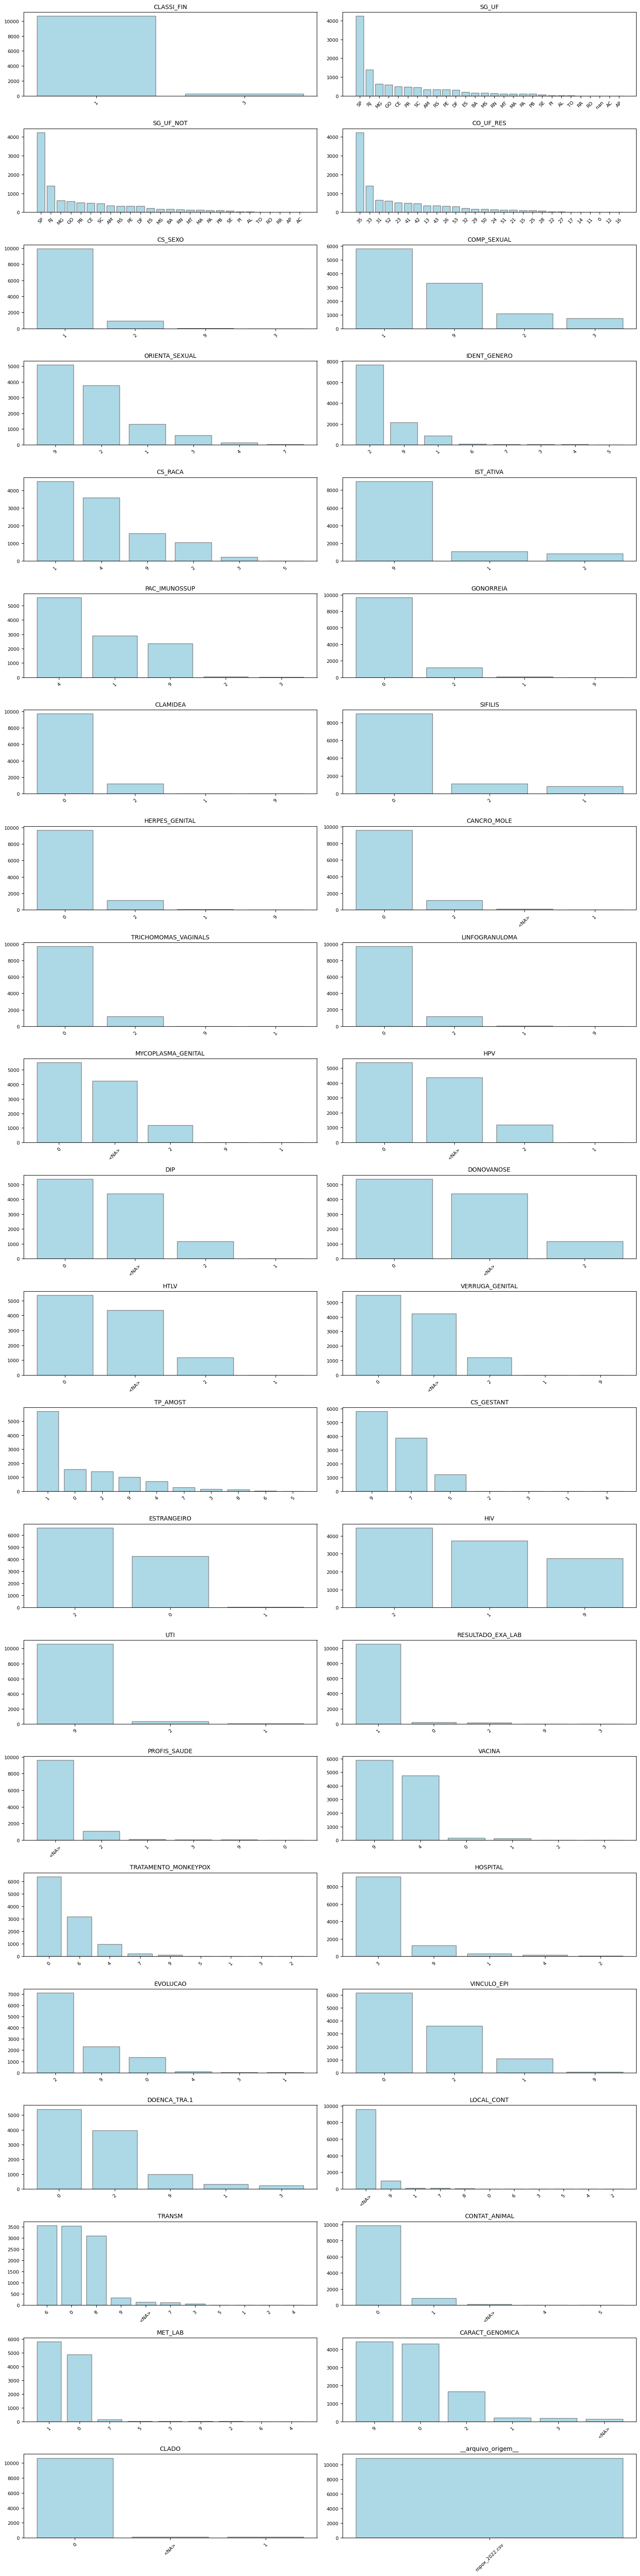

In [21]:
# 📊 EDA — Variáveis Categóricas (nominais/ordinais)
# ---------------------------------------------------
# - Objetivo: visualizar a distribuição de categorias em cada variável.
# - Inclui variáveis categóricas textuais e numéricas codificadas.
# - Variáveis com alta cardinalidade são listadas e desconsideradas dos gráficos.
# - Fonte: dataframe base_mpox (dados brutos).
# - Observação: warnings de fontes (glyphs) são ignorados apenas nesta etapa.

import warnings
#import matplotlib.pyplot as plt

# Seleciona colunas categóricas (texto + numéricas representando categorias)
cat_cols = [c for c in base_mpox.select_dtypes(include=['object', 'category', 'int64', 'Int64']).columns]

# Detecta variáveis com alta cardinalidade (exemplo: >30 categorias únicas)
high_card_cols = [c for c in cat_cols if base_mpox[c].nunique(dropna=False) > 30]

# Filtra para o plotting
plot_cols = [c for c in cat_cols if c not in high_card_cols]

# Aviso sobre variáveis desconsideradas
if high_card_cols:
    print("⚠️ Aviso: As seguintes variáveis foram desconsideradas da visualização devido à alta cardinalidade:")
    for c in high_card_cols:
        print(f" - {c} ({base_mpox[c].nunique(dropna=False)} categorias)")

# Grid de subplots
n_cols = 2
FIGSIZE = (15, 60)      # tamanho da figura
n_rows = -(-len(plot_cols) // n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=FIGSIZE)
axes = axes.flatten()

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", message="Glyph.*missing from font")

    for i, col in enumerate(plot_cols):
        counts = base_mpox[col].value_counts(dropna=False)
        axes[i].bar(counts.index.astype(str), counts.values,
                    color="lightblue", edgecolor="gray")
        axes[i].set_title(col, fontsize=10)
        axes[i].tick_params(axis="x", rotation=45, labelsize=8)
        axes[i].tick_params(axis="y", labelsize=8)

    # Remove eixos extras
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

# 🔇 Suprime warnings apenas durante plt.show()
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

plt.tight_layout()
plt.show()


###📊 EDA — Gráficos de barras para numéricos que representam categorias (códigos/binárias)

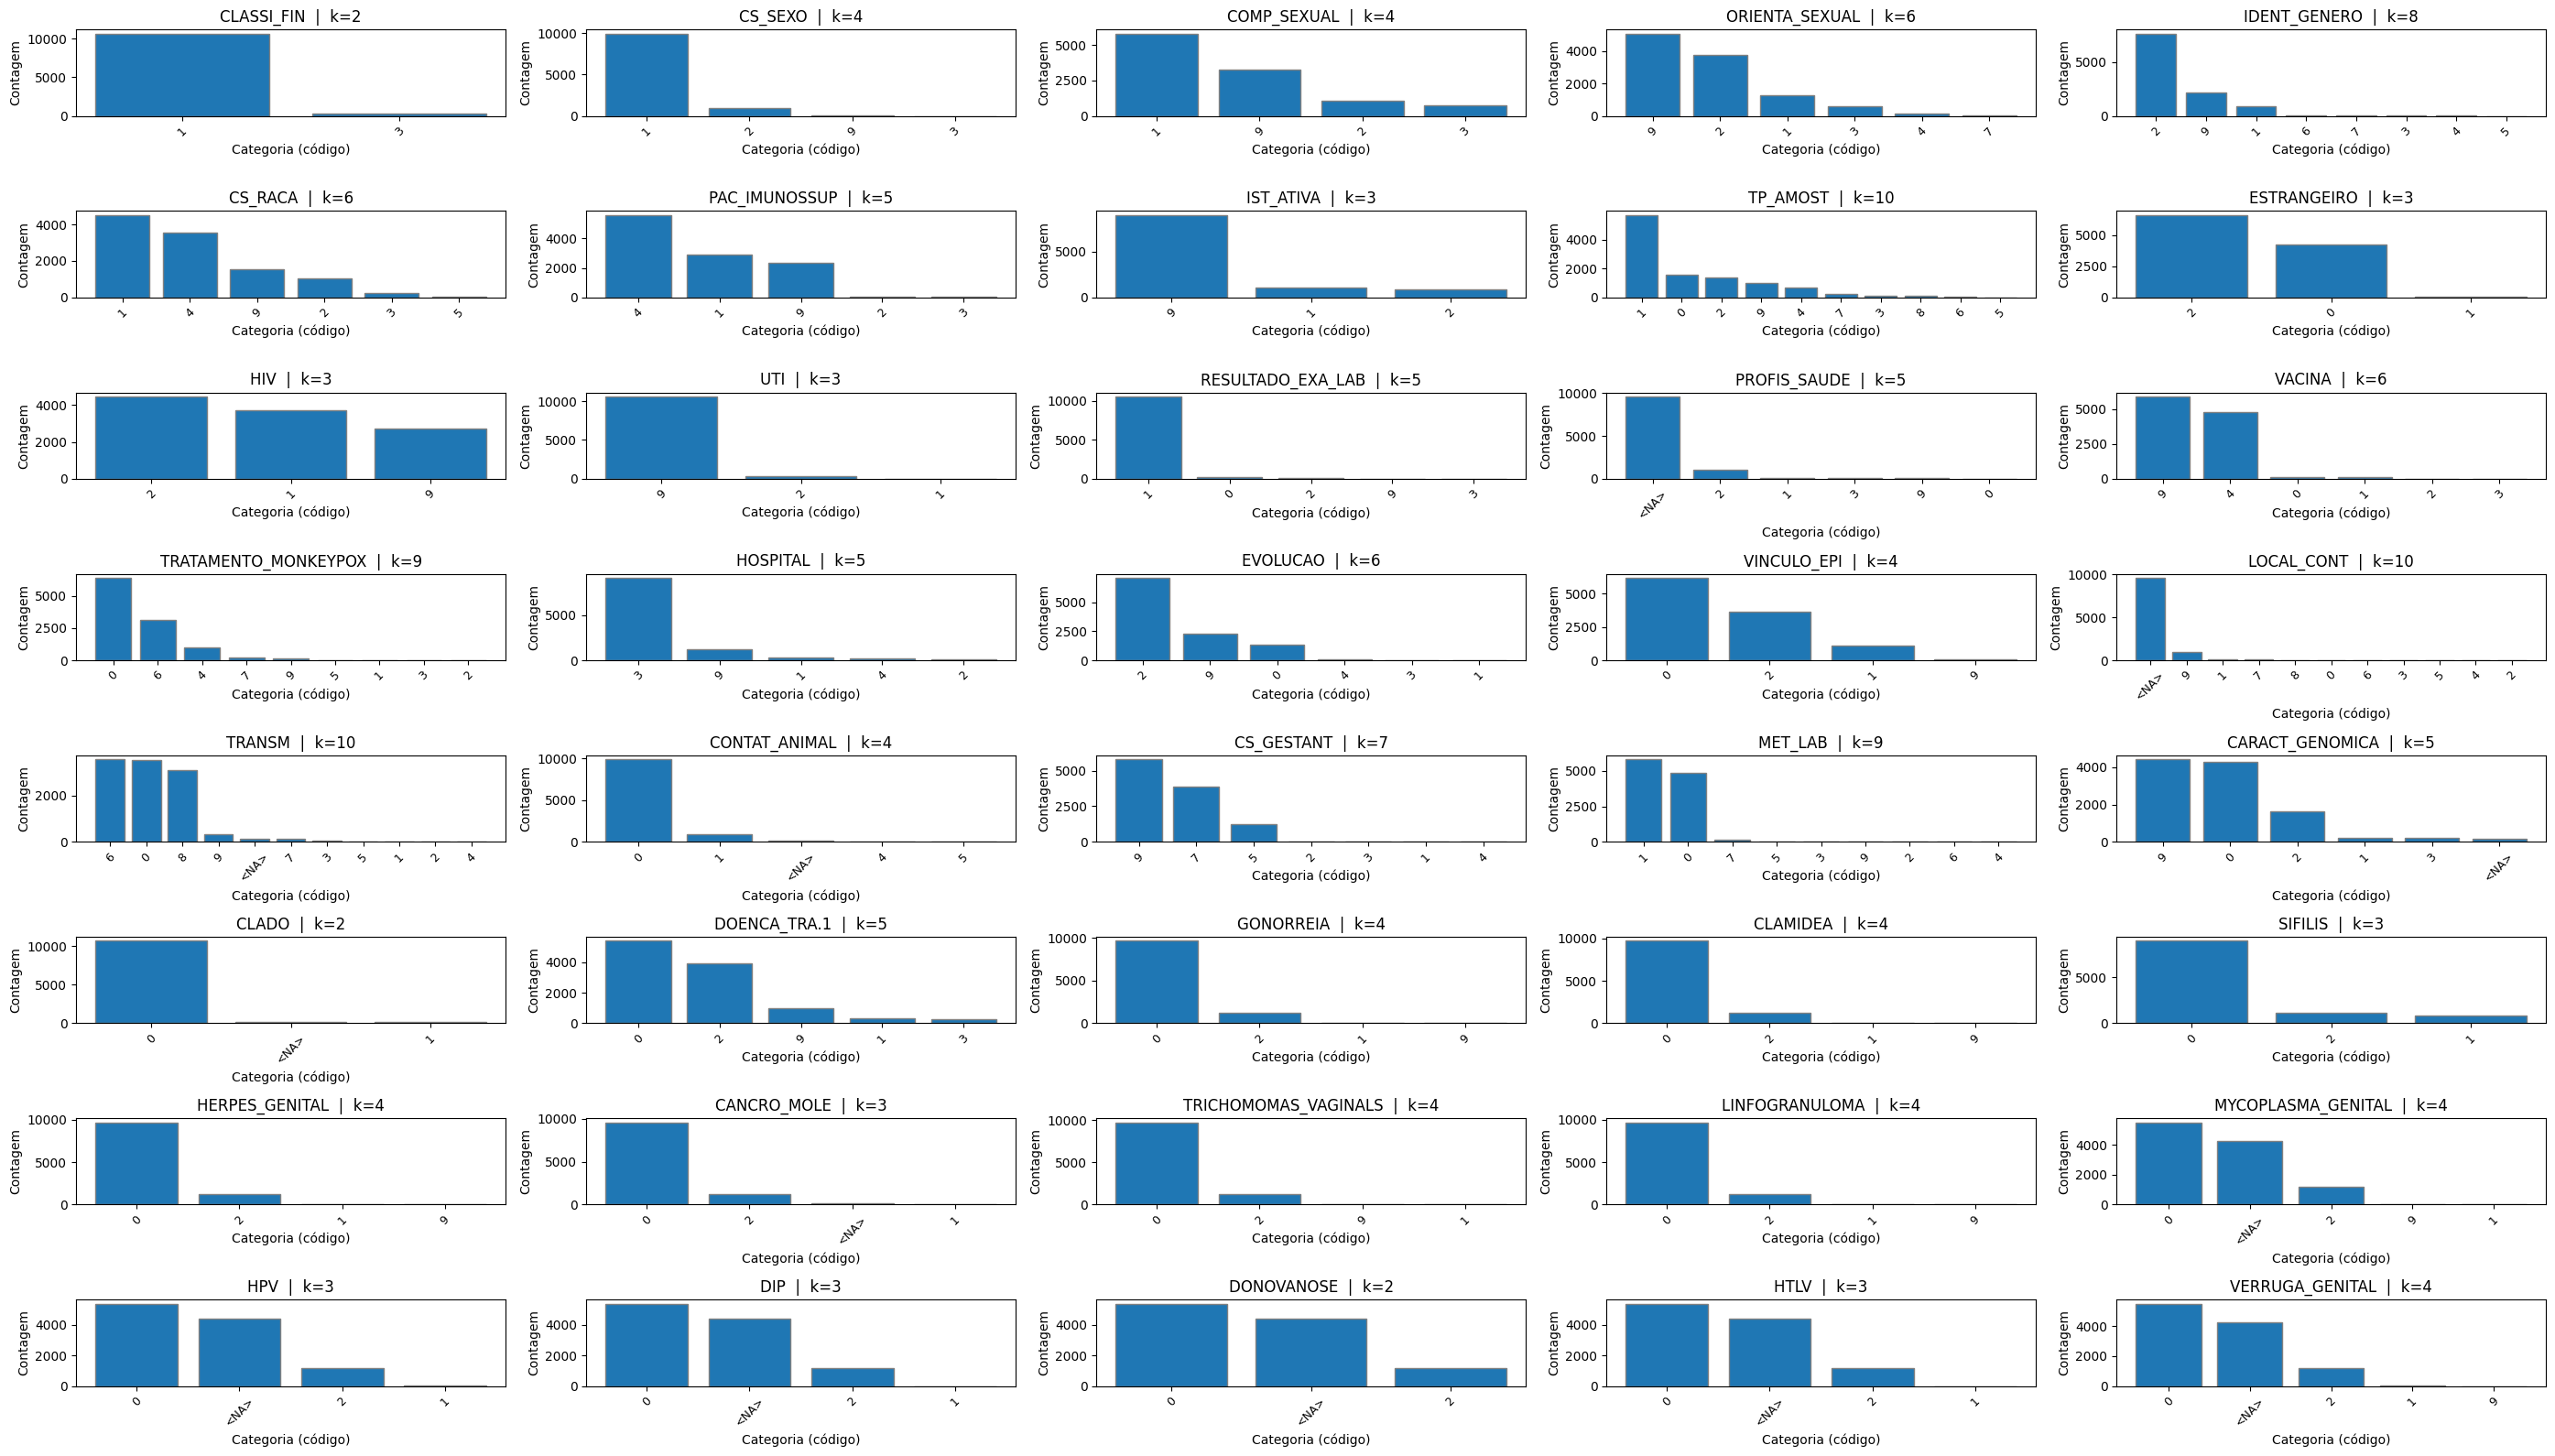

✅ Barras concluídas. Colunas plotadas: 40  |  Ignoradas por cardinalidade: 0


In [22]:
# 📊 EDA — Gráficos de barras para numéricos que representam categorias (códigos/binárias)
# ----------------------------------------------------------------------------------------
# Ideia: variáveis int/float que são, na prática, códigos de categoria (p.ex. CS_SEXO, CLASSI_FIN),
# devem ser vistas como categóricas e, portanto, inspecionadas com gráfico de barras (value_counts).
#
# Como identificar?
# - Usa teus vetores de “numéricos categóricos”: numerical_as_nominal_categ_cols e numerical_as_binary_categ_cols
# - Inclui CS_GESTANT (tratada como categórica nominal, por consenso)
#
# O snippet:
# 1) Seleciona essas colunas se existirem no dataframe;
# 2) Aplica filtro de cardinalidade (opcional) para evitar poluição visual;
# 3) Plota grid de barras (ordenado por frequência);
# 4) Suprime warnings só aqui.

#import numpy as np
#import matplotlib.pyplot as plt
import warnings

# --- parâmetros ajustáveis ---
N_COLS = 5
FIGSIZE = (28, 16)
MAX_CARD = 30   # ignora colunas com mais de 30 categorias distintas no plot (ainda listadas)
# -----------------------------

# Garante listas existentes (vêm do teu setup anterior)
num_cat_cols = []
for lst in [
    numerical_as_nominal_categ_cols,
    numerical_as_binary_categ_cols,
]:
    num_cat_cols.extend([c for c in lst if c in base_mpox.columns])

# Inclui CS_GESTANT explicitamente como categórica nominal
if 'CS_GESTANT' in base_mpox.columns and 'CS_GESTANT' not in num_cat_cols:
    num_cat_cols.append('CS_GESTANT')

num_cat_cols = list(dict.fromkeys(num_cat_cols))  # dedup

if not num_cat_cols:
    print("⚠️ Não há variáveis numéricas categóricas para plot.")
else:
    # Cardinalidade e seleção
    high_card = []
    plot_cols = []
    for c in num_cat_cols:
        nunique = base_mpox[c].dropna().nunique()
        if nunique > MAX_CARD:
            high_card.append((c, nunique))
        else:
            plot_cols.append(c)

    # Avisos de alta cardinalidade (não plotadas)
    if high_card:
        print("ℹ️ Variáveis com alta cardinalidade (não plotadas):")
        for c, k in sorted(high_card, key=lambda x: -x[1]):
            print(f"  • {c}: {k} categorias")

    if not plot_cols:
        print("⚠️ Todas as variáveis categóricas numéricas excederam o limite de cardinalidade para plot.")
    else:
        n = len(plot_cols)
        n_rows = int(np.ceil(n / N_COLS))

        with warnings.catch_warnings():
            warnings.simplefilter("ignore")

            fig, axes = plt.subplots(n_rows, N_COLS, figsize=FIGSIZE)
            axes = np.array(axes).reshape(-1) if hasattr(axes, 'reshape') else np.array([axes])

            for i, col in enumerate(plot_cols):
                s = base_mpox[col]
                vc = s.value_counts(dropna=False)
                # Ordena por frequência
                vc = vc.sort_values(ascending=False)

                ax = axes[i]
                ax.bar(vc.index.astype(str), vc.values, edgecolor="gray")
                ax.set_title(f"{col}  |  k={vc.index.nunique()}")
                ax.set_xlabel("Categoria (código)")
                ax.set_ylabel("Contagem")
                ax.tick_params(axis='x', rotation=45, labelsize=9)

            # apaga eixos sobrando
            for j in range(i + 1, len(axes)):
                axes[j].axis('off')

            # 🔇 Suprime warnings apenas durante plt.show()
            with warnings.catch_warnings():
              warnings.simplefilter("ignore")

            plt.tight_layout()
            plt.show()

    print(f"✅ Barras concluídas. Colunas plotadas: {len(plot_cols)}  |  Ignoradas por cardinalidade: {len(high_card)}")


### 📊 Resumo estatístico das variáveis numéricas reais

In [23]:
"""# 📊 Resumo estatístico das variáveis numéricas reais
# ---------------------------------------------------
# - Calcula estatísticas descritivas básicas + medidas de forma (assimetria e curtose).
# - Ajuda a identificar distribuições enviesadas e caudas pesadas.

import pandas as pd
from scipy.stats import skew, kurtosis

stats_summary = []

for col in num_real_cols:
    data = base_mpox[col].dropna()
    stats_summary.append({
        "Variável": col,
        "N": len(data),
        "Média": round(data.mean(), 2),
        "Mediana": round(data.median(), 2),
        "Desvio Padrão": round(data.std(), 2),
        "Mínimo": data.min(),
        "Máximo": data.max(),
        "Assimetria (skew)": round(skew(data), 2),
        "Curtose": round(kurtosis(data), 2)  # curtose > 3 → caudas pesadas
    })

stats_df = pd.DataFrame(stats_summary)
print("📌 Resumo Estatístico — Variáveis Numéricas Reais")
display(stats_df)

"""


'# 📊 Resumo estatístico das variáveis numéricas reais\n# ---------------------------------------------------\n# - Calcula estatísticas descritivas básicas + medidas de forma (assimetria e curtose).\n# - Ajuda a identificar distribuições enviesadas e caudas pesadas.\n\nimport pandas as pd\nfrom scipy.stats import skew, kurtosis\n\nstats_summary = []\n\nfor col in num_real_cols:\n    data = base_mpox[col].dropna()\n    stats_summary.append({\n        "Variável": col,\n        "N": len(data),\n        "Média": round(data.mean(), 2),\n        "Mediana": round(data.median(), 2),\n        "Desvio Padrão": round(data.std(), 2),\n        "Mínimo": data.min(),\n        "Máximo": data.max(),\n        "Assimetria (skew)": round(skew(data), 2),\n        "Curtose": round(kurtosis(data), 2)  # curtose > 3 → caudas pesadas\n    })\n\nstats_df = pd.DataFrame(stats_summary)\nprint("📌 Resumo Estatístico — Variáveis Numéricas Reais")\ndisplay(stats_df)\n\n'

### 📊 EDA — Boxplots de variáveis numéricas

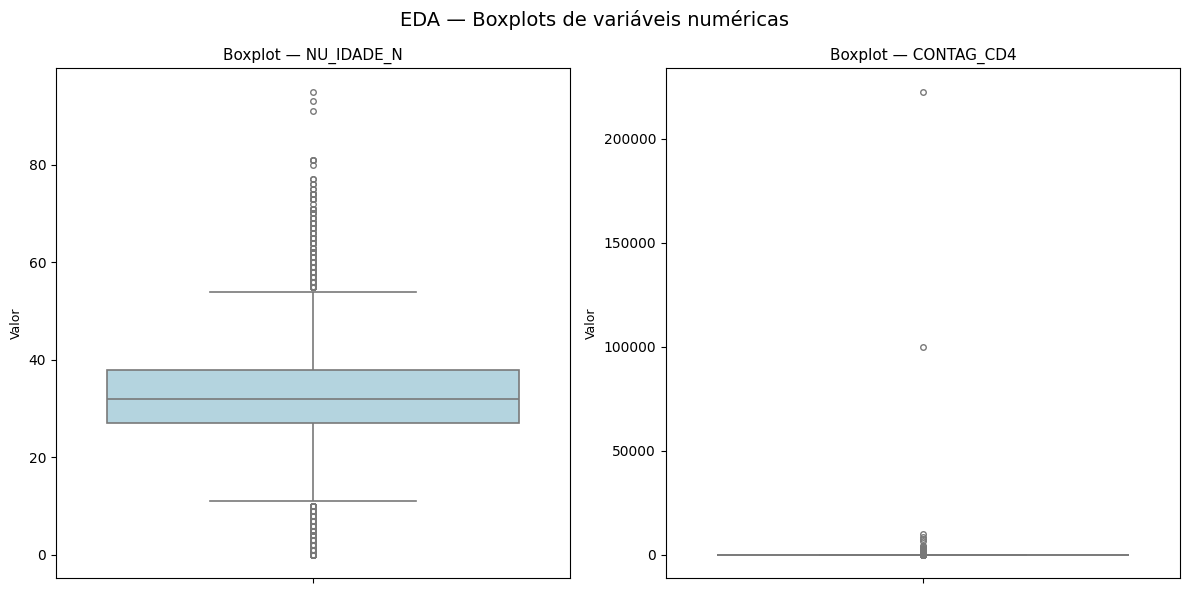

In [24]:
# 📊 EDA — Boxplots de variáveis numéricas
# ----------------------------------------
# - Objetivo: identificar outliers e dispersão das variáveis numéricas contínuas.
# - Inclui apenas variáveis numéricas de fato (não-categóricas).
# - Cada variável terá um boxplot independente.
# - Warnings visuais (glyphs, fontes) são ignorados apenas nesta etapa.

#import matplotlib.pyplot as plt
#import seaborn as sns
#import warnings

# Suprime warnings apenas durante os gráficos
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    # Seleção: apenas numéricas contínuas/discretas (já definidas nos vetores)
    num_cols = [c for c in numerical_discrete_cols if c in base_mpox.columns]

    # Layout dinâmico (até 2 colunas)
    n_cols = 2
    n_rows = -(-len(num_cols) // n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6 * n_rows))

    # Garante que axes seja sempre iterável como array 1D
    if isinstance(axes, plt.Axes):
        axes = [axes]
    else:
        axes = axes.ravel()

    for ax, col in zip(axes, num_cols):
        sns.boxplot(y=base_mpox[col], ax=ax, color="lightblue", fliersize=4, linewidth=1.2)
        ax.set_title(f"Boxplot — {col}", fontsize=11)
        ax.set_ylabel("Valor", fontsize=9)

    # Remove eixos extras (se sobrar espaço no grid)
    for ax in axes[len(num_cols):]:
        fig.delaxes(ax)

    plt.suptitle("EDA — Boxplots de variáveis numéricas", fontsize=14)
    plt.tight_layout()
    plt.show()


### 📊 EDA — Heatmap de Correlação (variáveis numéricas reais)

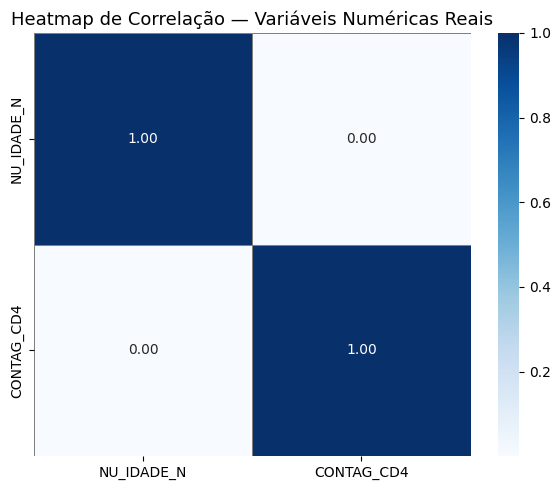

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [25]:
# 📊 EDA — Heatmap de Correlação (variáveis numéricas reais)
# ---------------------------------------------------------
# - Objetivo: visualizar correlação linear entre variáveis numéricas reais (contínuas/discretas).
# - Inclui apenas variáveis como idade (NU_IDADE_N) e contagem CD4 (CONTAG_CD4).
# - Diagnóstico: identificar redundância ou relações clínicas relevantes.
# - Obs: nesta fase NÃO removemos nada, apenas exploramos visualmente.

#import matplotlib.pyplot as plt
#import seaborn as sns
import warnings

# Suprime warnings só durante o gráfico
warnings.filterwarnings("ignore")

# Seleciona apenas numéricas reais
num_reais = ['NU_IDADE_N', 'CONTAG_CD4']
num_reais = [c for c in num_reais if c in base_mpox.columns]

plt.figure(figsize=(6, 5))
sns.heatmap(
    base_mpox[num_reais].corr(method="pearson"),
    annot=True, fmt=".2f", cmap="Blues", cbar=True,
    linewidths=0.5, linecolor="gray"
)
plt.title("Heatmap de Correlação — Variáveis Numéricas Reais", fontsize=13)
plt.tight_layout()
plt.show()

# Restaura warnings
warnings.resetwarnings()


### 📊 EDA — Pairplot de Variáveis Numéricas Reais

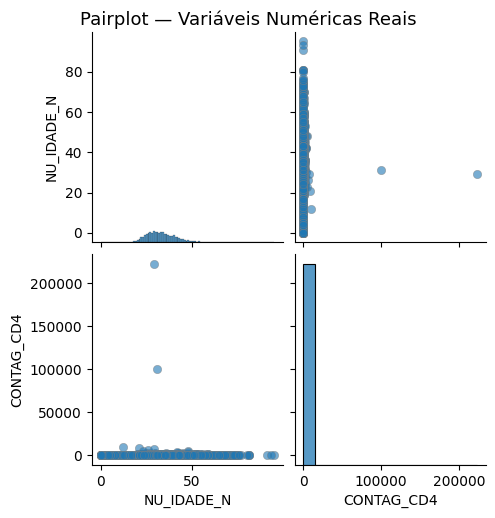

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [26]:
# 📊 EDA — Pairplot de Variáveis Numéricas Reais
# -----------------------------------------------
# - Objetivo: visualizar distribuições e dispersões conjuntas entre variáveis numéricas reais.
# - Inclui NU_IDADE_N (idade) e CONTAG_CD4 (imunidade).
# - Ajuda a observar dispersão, outliers e padrões clínicos.

#import seaborn as sns
#import matplotlib.pyplot as plt
import warnings

# Suprime warnings apenas durante os gráficos
warnings.filterwarnings("ignore")

num_reais = ['NU_IDADE_N', 'CONTAG_CD4']
num_reais = [c for c in num_reais if c in base_mpox.columns]

sns.pairplot(base_mpox[num_reais], diag_kind="hist", plot_kws={"alpha":0.6, "edgecolor":"gray"})
plt.suptitle("Pairplot — Variáveis Numéricas Reais", y=1.02, fontsize=13)
plt.show()

# Restaura warnings
warnings.resetwarnings()


---

## **Pré-processamento → deixa os dados consistentes, limpos e completos.**

---

### **Atividade 1: Limpeza de Dados Incorretos**
- Identificar valores numéricos inválidos, por exemplo, idades em < 0, data acima da data atual ou zero, preços absurdos, etc

   (Aqui também será feito consolidação de valores categóricos que são sinônimos)
- Remover ou corrigir essas entradas

#### Limpa dados

In [27]:
## 🧽 Limpeza de dados (recodificações + coerências de negócio)
mpox_2022_typefix = base_mpox.copy()

# 1) Recodificações de códigos fora do dicionário
#   - 0/3 conforme regras validadas
if 'TP_AMOST' in base_mpox.columns:
    base_mpox['TP_AMOST'] = base_mpox['TP_AMOST'].replace({0:9})
if 'MET_LAB' in base_mpox.columns:
    base_mpox['MET_LAB'] = base_mpox['MET_LAB'].replace({0:9})
if 'CARACT_GENOMICA' in base_mpox.columns:
    base_mpox['CARACT_GENOMICA'] = base_mpox['CARACT_GENOMICA'].replace({0:9, 3:9})
if 'CLADO' in base_mpox.columns:
    base_mpox['CLADO'] = base_mpox['CLADO'].replace({0:9})
if 'TRATAMENTO_MONKEYPOX' in base_mpox.columns:
    base_mpox['TRATAMENTO_MONKEYPOX'] = base_mpox['TRATAMENTO_MONKEYPOX'].replace({0:4, 9:4})
if 'LOCAL_CONT' in base_mpox.columns:
    base_mpox['LOCAL_CONT'] = base_mpox['LOCAL_CONT'].replace({0:9})
if 'TRANSM' in base_mpox.columns:
    base_mpox['TRANSM'] = base_mpox['TRANSM'].replace({0:8})
if 'CONTAT_ANIMAL' in base_mpox.columns:
    base_mpox['CONTAT_ANIMAL'] = base_mpox['CONTAT_ANIMAL'].replace({0:5, 9:5})
if 'DOENCA_TRA.1' in base_mpox.columns:
    mask_ood = ~base_mpox['DOENCA_TRA.1'].isin([1,2,9]) & base_mpox['DOENCA_TRA.1'].notna()
    base_mpox.loc[mask_ood, 'DOENCA_TRA.1'] = 9

# 2) Binárias ISTs: 2/9/vazio → 0, e coerência com IST_ATIVA
for c in binarias_ist:
    if c in base_mpox.columns:
        base_mpox[c] = base_mpox[c].replace({2:0, 9:0}).fillna(0).astype('Int64')

if 'IST_ATIVA' in base_mpox.columns:
    mask_inativa = base_mpox['IST_ATIVA'] != 1
    cols_exist = [c for c in binarias_ist if c in base_mpox.columns]
    base_mpox.loc[mask_inativa, cols_exist] = 0

# 3) CS_GESTANT: domínio + coerência com CS_SEXO
if 'CS_GESTANT' in base_mpox.columns:
    valid = {1,2,3,4,5,7,9}
    mask_ood = ~base_mpox['CS_GESTANT'].isin(valid) & base_mpox['CS_GESTANT'].notna()
    base_mpox.loc[mask_ood, 'CS_GESTANT'] = 9

    if 'CS_SEXO' in base_mpox.columns:
        base_mpox['CS_SEXO'] = to_Int64(base_mpox['CS_SEXO'])
        mask_not_fem = base_mpox['CS_SEXO'].fillna(9) != 2
        mask_tri = base_mpox['CS_GESTANT'].isin([1,2,3,4])
        base_mpox['cs_gestant_incoerente'] = (mask_not_fem & mask_tri)

# 4) NU_IDADE_N: flag de outliers
if 'NU_IDADE_N' in base_mpox.columns:
    base_mpox['idade_outlier'] = base_mpox['NU_IDADE_N'].notna() & (
        (base_mpox['NU_IDADE_N'] < 0) | (base_mpox['NU_IDADE_N'] > 110)
    )

# 5) CONTAG_CD4: flag de outliers
# ---------------------------------------------------------
# - Define como outliers os valores negativos e os acima do limiar clínico (outlier_threshold_max).
# - Regra baseada em consensos médicos: valores normais variam até ~1500 células/µL,
#   aceitando exceções até o limite técnico (~3000). Acima disso é considerado inconsistente.
# ---------------------------------------------------------

if "CONTAG_CD4" in base_mpox.columns:
    base_mpox["cd4_outlier"] = base_mpox["CONTAG_CD4"].notna() & (
        (base_mpox["CONTAG_CD4"] < 0) | (base_mpox["CONTAG_CD4"] > outlier_threshold_max)
    )





print("✔️ Limpeza aplicada (recodes + regras de negócio + flags de outliers).\n")


✔️ Limpeza aplicada (recodes + regras de negócio + flags de outliers).



/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


### 🔎 Auditoria Pós-limpeza de Dados

In [28]:
## 🔎 Auditoria pós-limpeza de dados

# 1) Checagem ISTs após recodificação
if 'IST_ATIVA' in base_mpox.columns:
    ist_cols_exist = [c for c in binarias_ist if c in base_mpox.columns]
    if len(ist_cols_exist) == 0:
        print("ℹ️ Nenhuma coluna IST específica encontrada para checar.")
    else:
        mask_inativa = base_mpox['IST_ATIVA'] != 1
        ist_subset = base_mpox.loc[mask_inativa, ist_cols_exist].fillna(0)
        # Linhas com qualquer IST ativa quando IST_ATIVA ≠ 1
        viol = (ist_subset.sum(axis=1) > 0).sum()
        if viol > 0:
            print(f"⚠️ {int(viol)} registros com ISTs ativas apesar de IST_ATIVA ≠ 1.")
            # (Opcional) Mostrar top colunas que mais violam
            viol_cols = ist_subset.sum(axis=0).sort_values(ascending=False)
            print("   Colunas com mais violações:\n", viol_cols[viol_cols > 0])
        else:
            print("✔️ Coerência ISTs verificada (IST_ATIVA ≠ 1 ⇒ todas ISTs = 0).")
else:
    print("ℹ️ IST_ATIVA não está no dataframe — auditoria de ISTs pulada.")

# 2) Checagem NU_IDADE_N
if 'NU_IDADE_N' in base_mpox.columns and 'idade_outlier' in base_mpox.columns:
    out = int(base_mpox['idade_outlier'].sum())
    print(f"⚠️ {out} registros com idade fora do intervalo plausível (<0 ou >110).") if out > 0 else print("✔️ Idades plausíveis.")
else:
    print("ℹ️ Flag 'idade_outlier' não encontrada — pula checagem de idade.")

# 3) Checagem CS_GESTANT × CS_SEXO
if 'CS_GESTANT' in base_mpox.columns and 'cs_gestant_incoerente' in base_mpox.columns:
    incoer = int(base_mpox['cs_gestant_incoerente'].sum())
    print(f"⚠️ {incoer} registros incoerentes (trimestre em não-femininos).") if incoer > 0 else print("✔️ CS_GESTANT coerente com CS_SEXO.\n")
else:
    print("ℹ️ Flag 'cs_gestant_incoerente' não encontrada — pula checagem de coerência gestante/sexo.\n")


✔️ Coerência ISTs verificada (IST_ATIVA ≠ 1 ⇒ todas ISTs = 0).
✔️ Idades plausíveis.
✔️ CS_GESTANT coerente com CS_SEXO.



/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


### 📊 Boxplot — CONTAG_CD4 pós-limpeza

/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:700: PendingDeprecationWarning: vert: bool will be deprecated in a future version. Use orientation: {'vertical', 'horizontal'} instead.
  artists = ax.bxp(**boxplot_kws)


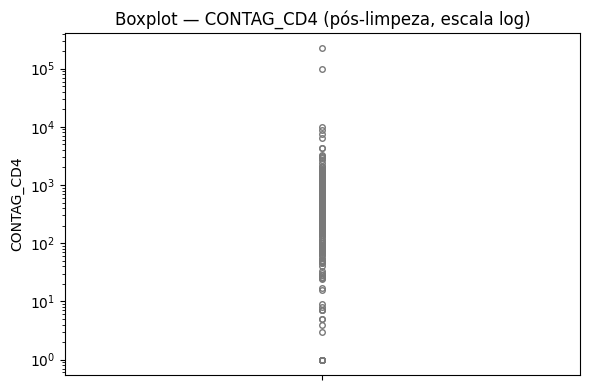

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [29]:
# 📊 Boxplot — CONTAG_CD4 pós-limpeza
# ---------------------------------------------------
# - Objetivo: visualizar outliers residuais após limpeza.
# - Eixo Y em escala log para evidenciar dispersão extrema.
# - Útil para reforçar diagnóstico complementar ao histograma.

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

plt.figure(figsize=(6,4))
sns.boxplot(y=base_mpox["CONTAG_CD4"], color="lightblue", fliersize=4, linewidth=1.2)
plt.yscale("log")
plt.title("Boxplot — CONTAG_CD4 (pós-limpeza, escala log)")

# 🔇 Suprime warnings apenas durante plt.show()
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    plt.tight_layout()
    plt.show()


### 📊 Auditoria visual — Binárias recodificadas (0/1)

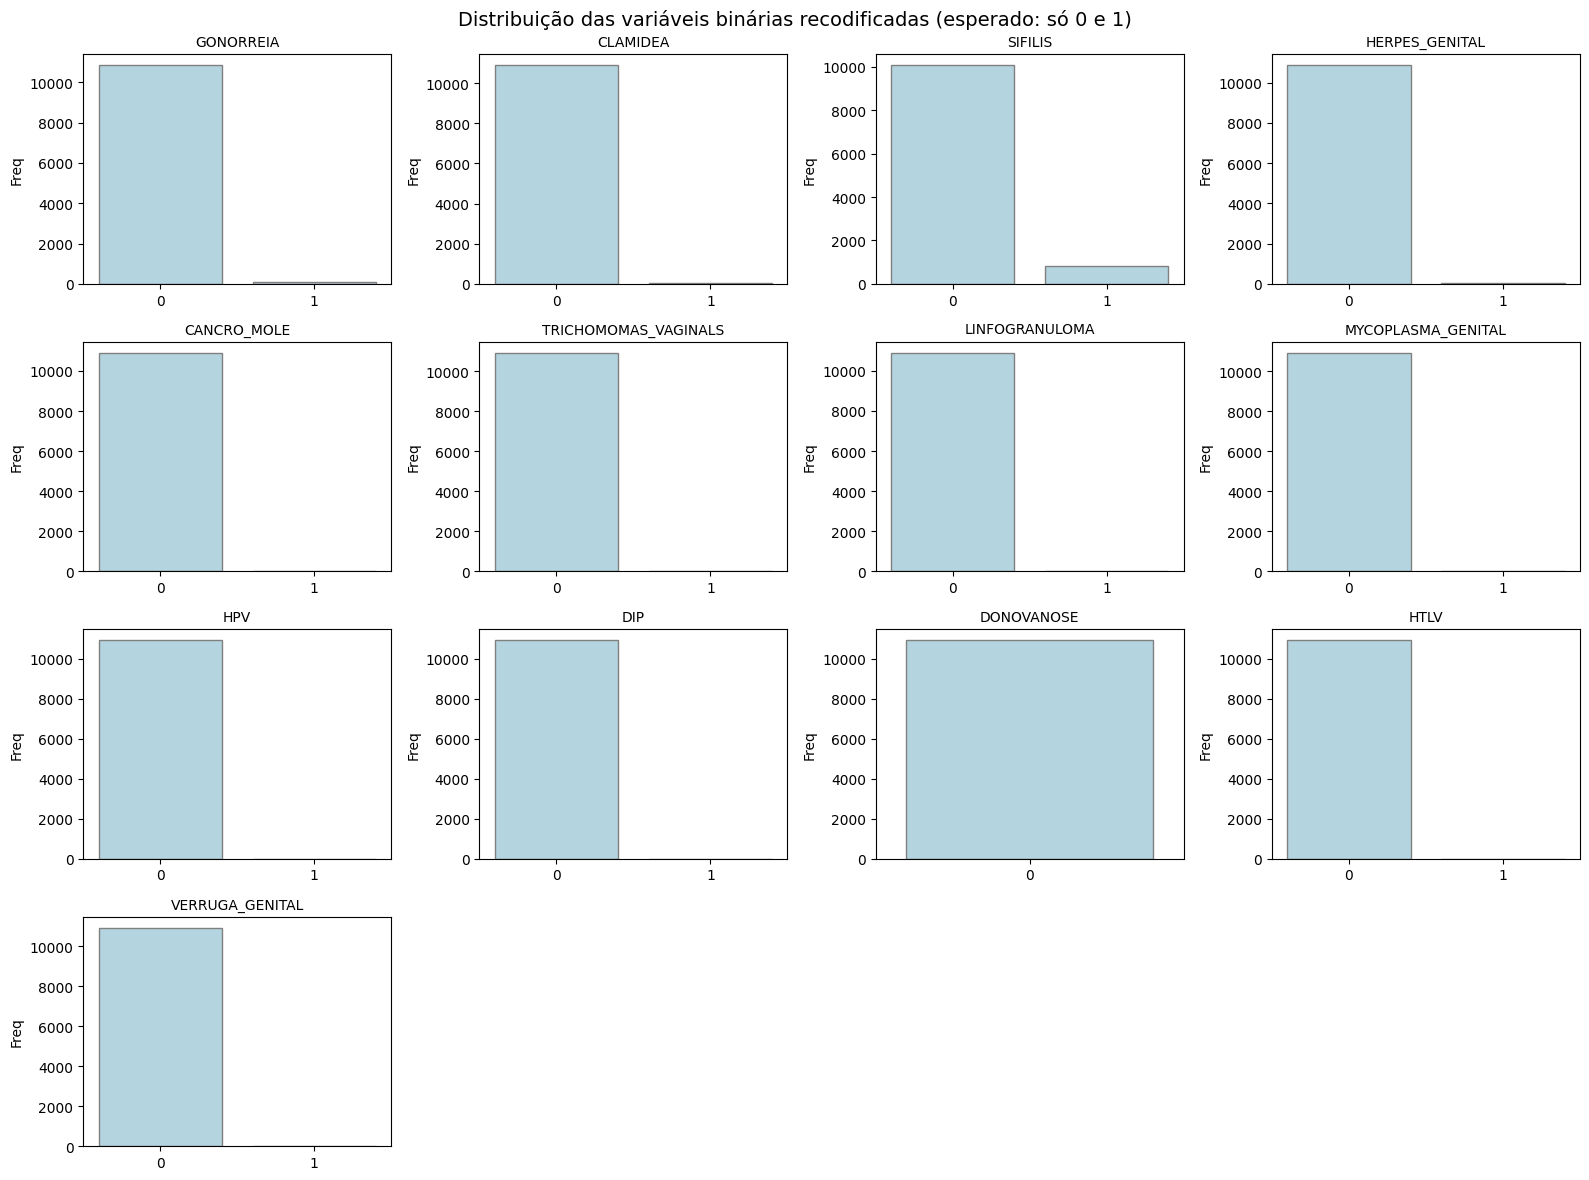

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [30]:
# 📊 Auditoria visual — Binárias recodificadas (0/1)
# ---------------------------------------------------
# - Objetivo: verificar graficamente se, após limpeza/recodificação,
#   todas as variáveis binárias estão restritas a {0,1}.
# - Método: barplots lado a lado para cada coluna binária.
# - Obs: valores inesperados (ex: 2, 9, NaN) aparecerão como barras extras.

#import matplotlib.pyplot as plt
#import seaborn as sns
#import warnings

bin_cols = [c for c in numerical_as_binary_categ_cols if c in base_mpox.columns]

ncols = 4
nrows = -(-len(bin_cols) // ncols)  # ceil division

with warnings.catch_warnings():
    warnings.simplefilter("ignore")  # 👈 Suprime warnings só aqui

    fig, axes = plt.subplots(nrows, ncols, figsize=(4*ncols, 3*nrows))
    axes = axes.flatten()

    for ax, col in zip(axes, bin_cols):
        sns.countplot(x=base_mpox[col], ax=ax, color="lightblue", edgecolor="gray")
        ax.set_title(col, fontsize=10)
        ax.set_xlabel("")
        ax.set_ylabel("Freq")

    # Remove eixos vazios se sobrar espaço
    for ax in axes[len(bin_cols):]:
        ax.axis("off")

    plt.suptitle("Distribuição das variáveis binárias recodificadas (esperado: só 0 e 1)", fontsize=14)
    plt.tight_layout()
    plt.show()


### Salva Dados Pós-limpeza em .csv (_#debug#_)
  Neste caso, pode-se notar, se houver, que os dados faltantes foram preenchidos, conforme técnica aplicada a cada variável.

In [31]:
mpox_2022_clean = base_mpox.copy()
Base_csv_file = 'mpox_2022_clean.csv'

#debug#
mpox_2022_clean.to_csv(Base_csv_file, index=False, mode='w') # Arquivo-base a ser tratado

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


### **Atividade 2: Imputação de valores faltantes**
- Identificar valores faltantes: NaN e ?
- Usar as técnicas: média e moda

#### Levanta os dados faltantes

In [32]:
#import numpy as np

# Definições extras de "faltantes" além de NaN/NaT
faltantes_extras = ["?", "NA", "N/A", "null", "vazio", " "]

def levantamento_faltantes(df, extras=faltantes_extras):
    report = []

    for col in df.columns:
        total = len(df)

        # Contagem de NaN / None / NaT
        n_null = df[col].isna().sum()

        # Contagem de valores extras (strings ou equivalentes)
        n_extras = df[col].isin(extras).sum() if df[col].dtype == "object" else 0

        # Total de faltantes
        n_total = n_null + n_extras
        perc = n_total / total if total > 0 else 0

        if n_total > 0:
            report.append({
                "Variável": col,
                "Total registros": total,
                "Faltantes (NaN/NaT/None)": n_null,
                "Faltantes extras": n_extras,
                "Faltantes total": n_total,
                "Faltantes (%)": f"{perc:.1%}"
            })

    return pd.DataFrame(report).sort_values(by="Faltantes (%)", ascending=False)

# 🔎 Rodar diagnóstico
df_faltantes = levantamento_faltantes(base_mpox)
print(df_faltantes)


           Variável  Total registros  Faltantes (NaN/NaT/None)  \
8        DT_INTERNA            10920                     10402   
7         OUTRO_DES            10920                     10054   
9       DT_EVOLUCAO            10920                      9932   
4      PROFIS_SAUDE            10920                      9594   
10       LOCAL_CONT            10920                      9594   
..              ...              ...                       ...   
12    CONTAT_ANIMAL            10920                       143   
13  CARACT_GENOMICA            10920                       143   
14            CLADO            10920                       143   
1        DT_SIN_PRI            10920                        52   
0             SG_UF            10920                         4   

    Faltantes extras  Faltantes total Faltantes (%)  
8                  0            10402         95.3%  
7                  0            10054         92.1%  
9                  0             9932        

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


#### Imputa dados

In [33]:
# ============================================================
# IMPUTAÇÃO + AUDITORIA (bloco sequencial, pronto para rodar)
# Regra 5/20/40; Datas NÃO são imputadas; cria *_missing
# ============================================================

# import pandas as pd
# import numpy as np

# ---------- Validadores mínimos (garante que vetores e DF existem) ----------
_required = [
    "base_mpox",
    "nominal_categorical_cols",
    "list_multiple_categorical_cols",
    "text_cols",
    "numerical_as_binary_categ_cols",
    "numerical_as_nominal_categ_cols",
    "numerical_discrete_cols",
    "date_temporal_cols",
]
_missing = [name for name in _required if name not in globals()]
if _missing:
    raise NameError(f"As seguintes variáveis precisam estar definidas antes deste bloco: {_missing}")

# ---------- Helpers ----------
def _safe_mode(s: pd.Series):
    m = s.mode(dropna=True)
    return (None if m.empty else m.iloc[0])

def _coerce_int64_nullable(s: pd.Series):
    return pd.to_numeric(s, errors='coerce').astype('Int64')

def _coerce_numeric(s: pd.Series):
    return pd.to_numeric(s, errors='coerce')

def _coerce_datetime(s: pd.Series):
    return pd.to_datetime(s, errors='coerce', dayfirst=True)

# ---------- 1) IMPUTAÇÃO ESTRATÉGICA (5/20/40) ----------
def imputar_estrategico(
    df,
    *,
    nominal_categorical_cols,
    list_multiple_categorical_cols,
    text_cols,
    numerical_as_binary_categ_cols,
    numerical_as_nominal_categ_cols,
    numerical_discrete_cols,
    date_temporal_cols,
    cutoff_baixo=0.05,        # <5%
    cutoff_moderado=0.20,     # 5–20%
    impute_on_moderate=True,  # 5–20% → imputar + flag
    numeric_use_median=True,  # numéricas: Mediana (True) ou Média (False)
    impute_dates=False,       # DATAS: manter NaT (não imputar)
    create_missing_indicators=True,
    missing_suffix="_missing"
):
    """
    Estratégia:
      - <5%        → imputar
      - 5–20%      → imputar + flag (se impute_on_moderate=True)
      - 20–40%     → avaliar; aqui mantemos regra conservadora: flag e (opcional) imputar
      - >40%       → não imputar; apenas flag
      - DATAS      → por design NÃO imputar; manter NaT + flag
      - TEXTO livre→ substituir NaN por "" (nada a declarar) + flag
    Retorna: df_imputado, report (dict por coluna com ação/valor)
    """
    df = df.copy()
    report = {}

    def choose_action(frac):
        if frac < cutoff_baixo:
            return "impute"
        elif frac < cutoff_moderado:
            return "impute+flag" if impute_on_moderate else "flag_only"
        elif frac < 0.40:
            # conservador: preferir flag; imputação opcional conforme caso
            return "flag_only"
        else:
            return "flag_only"

    def add_flag(col, mask_missing):
        if create_missing_indicators and col in df.columns:
            df[f"{col}{missing_suffix}"] = mask_missing.astype('Int64')

    # 1. Categóricas nominais (texto/IBGE)
    for col in [c for c in nominal_categorical_cols if c in df.columns]:
        if df[col].dtype == object:
            miss_mask = df[col].isna()
            frac = miss_mask.mean()
            action = choose_action(frac)
            moda = None
            n_imp = 0
            if action in ("impute","impute+flag"):
                moda = _safe_mode(df[col])
                if moda is not None:
                    n_before = miss_mask.sum()
                    df[col] = df[col].fillna(moda)
                    n_imp = int(n_before - df[col].isna().sum())
                else:
                    action = "flag_only"
            add_flag(col, miss_mask)
            report[col] = {"grupo":"cat_nom_texto","missing_frac":float(frac),
                           "action":action,"value":moda,"imputed":n_imp}
        else:
            df[col] = _coerce_int64_nullable(df[col])
            miss_mask = df[col].isna()
            frac = miss_mask.mean()
            action = choose_action(frac)
            moda = None
            n_imp = 0
            if action in ("impute","impute+flag"):
                moda = _safe_mode(df[col])
                if moda is not None:
                    n_before = miss_mask.sum()
                    df[col] = df[col].fillna(moda).astype('Int64')
                    n_imp = int(n_before - df[col].isna().sum())
                else:
                    action = "flag_only"
            add_flag(col, miss_mask)
            report[col] = {"grupo":"cat_nom_codigo","missing_frac":float(frac),
                           "action":action,"value":moda,"imputed":n_imp}

    # 2. Lista múltipla (SINTOMA): NaN → "" (nada a declarar) + flag
    for col in [c for c in list_multiple_categorical_cols if c in df.columns]:
        miss_mask = df[col].isna()
        n_before = miss_mask.sum()
        df[col] = df[col].fillna("")
        add_flag(col, miss_mask)
        report[col] = {"grupo":"lista_texto","missing_frac":float(miss_mask.mean()),
                       "action":"fill_empty_string","value":"","imputed":int(n_before)}

    # 3. Texto livre: NaN → "" (nada a declarar) + flag
    for col in [c for c in text_cols if c in df.columns]:
        miss_mask = df[col].isna()
        n_before = miss_mask.sum()
        df[col] = df[col].fillna("")
        add_flag(col, miss_mask)
        report[col] = {"grupo":"texto_livre","missing_frac":float(miss_mask.mean()),
                       "action":"fill_empty_string","value":"","imputed":int(n_before)}

    # 4. Binárias (0/1): moda
    for col in [c for c in numerical_as_binary_categ_cols if c in df.columns]:
        df[col] = _coerce_int64_nullable(df[col])
        miss_mask = df[col].isna()
        frac = miss_mask.mean()
        action = choose_action(frac)
        moda = None
        n_imp = 0
        if action in ("impute","impute+flag"):
            moda = _safe_mode(df[col])
            if moda is not None:
                n_before = miss_mask.sum()
                df[col] = df[col].fillna(moda).astype('Int64')
                n_imp = int(n_before - df[col].isna().sum())
            else:
                action = "flag_only"
        add_flag(col, miss_mask)
        report[col] = {"grupo":"binaria","missing_frac":float(frac),
                       "action":action,"value":moda,"imputed":n_imp}

    # 5. Categóricas nominais (numéricas/códigos): moda
    for col in [c for c in numerical_as_nominal_categ_cols if c in df.columns]:
        df[col] = _coerce_int64_nullable(df[col])
        miss_mask = df[col].isna()
        frac = miss_mask.mean()
        action = choose_action(frac)
        moda = None
        n_imp = 0
        if action in ("impute","impute+flag"):
            moda = _safe_mode(df[col])
            if moda is not None:
                n_before = miss_mask.sum()
                df[col] = df[col].fillna(moda).astype('Int64')
                n_imp = int(n_before - df[col].isna().sum())
            else:
                action = "flag_only"
        add_flag(col, miss_mask)
        report[col] = {"grupo":"cat_nom_num","missing_frac":float(frac),
                       "action":action,"value":moda,"imputed":n_imp}

    # 6. Numéricas reais/discretas: Mediana (ou Média)
    for col in [c for c in numerical_discrete_cols if c in df.columns]:
        s = _coerce_numeric(df[col])
        # Regra clínica CD4: negativos → NaN
        if col.upper() == "CONTAG_CD4":
            s = s.mask(s < 0, np.nan)

        miss_mask = s.isna()
        frac = miss_mask.mean()
        action = choose_action(frac)
        val = None
        n_imp = 0
        if action in ("impute","impute+flag"):
            val = (s.median(skipna=True) if numeric_use_median else s.mean(skipna=True))
            if pd.notna(val):
                n_before = miss_mask.sum()
                s = s.fillna(val)
                n_imp = int(n_before - s.isna().sum())
            else:
                action = "flag_only"
        # dtype final
        if (s.dropna() % 1 == 0).all():
            df[col] = s.round().astype('Int64')
        else:
            df[col] = s.astype(float)

        add_flag(col, miss_mask)
        report[col] = {"grupo":"numerica","missing_frac":float(frac),
                       "action":action,"value":(float(val) if val is not None else None),
                       "imputed":n_imp}

    # 7. Datas: NUNCA imputar; manter NaT + flag
    for col in [c for c in date_temporal_cols if c in df.columns]:
        dt = _coerce_datetime(df[col])
        miss_mask = dt.isna()
        frac = miss_mask.mean()
        # por design:
        action = "flag_only"
        df[col] = dt
        add_flag(col, miss_mask)
        report[col] = {"grupo":"data","missing_frac":float(frac),
                       "action":action,"value":None,"imputed":0}

    return df, report



# ---------- 2) AUDITORIA (apenas variáveis com faltantes; transposta) ----------
def auditar_imputacao_faltantes(df_before, df_after, report, transpose=True):
    """
    Mostra só variáveis que tinham faltantes no BEFORE.
    Colunas: % antes/depois, ação, valor imputado, estratégia (derivada do grupo).
    """
    audit = []
    n = len(df_before)

    for col, info in report.items():
        if col not in df_before.columns:
            continue
        before_na = df_before[col].isna().sum()
        after_na  = df_after[col].isna().sum() if col in df_after.columns else np.nan
        if before_na == 0:
            continue

        grupo = info.get("grupo", "")
        if grupo in ("cat_nom_texto","cat_nom_codigo","cat_nom_num","binaria"):
            estrategia = "Moda"
        elif grupo == "numerica":
            estrategia = "Mediana"
        elif grupo == "data":
            estrategia = "Não imputada (NaT)"
        elif grupo in ("lista_texto","texto_livre"):
            estrategia = '"" (nada a declarar)'
        else:
            estrategia = "-"

        audit.append({
            "Variável": col,
            "% antes": round(before_na / n * 100, 2),
            "% depois": round(after_na / n * 100, 2),
            "Ação": info.get("action","-"),
            "Valor imputado": info.get("value","-"),
            "Estratégia": estrategia
        })

    audit_df = pd.DataFrame(audit).set_index("Variável")
    return audit_df.T if transpose else audit_df





# ---------- 3) EXECUÇÃO (imputação → auditoria) ----------
mpox_2022_prep, report = imputar_estrategico(
    base_mpox,
    nominal_categorical_cols=nominal_categorical_cols,
    list_multiple_categorical_cols=list_multiple_categorical_cols,
    text_cols=text_cols,
    numerical_as_binary_categ_cols=numerical_as_binary_categ_cols,
    numerical_as_nominal_categ_cols=numerical_as_nominal_categ_cols,
    numerical_discrete_cols=numerical_discrete_cols,
    date_temporal_cols=date_temporal_cols,
    cutoff_baixo=0.05,        # 5%
    cutoff_moderado=0.20,     # 20%
    impute_on_moderate=True,  # 5–20%: imputar + flag
    numeric_use_median=True,  # numéricas → Mediana
    impute_dates=False,       # DATAS: manter NaT
    create_missing_indicators=True
)

print("✔️ Imputação concluída.")
print("Shape antes:", base_mpox.shape, " | depois:", mpox_2022_prep.shape, '\n')

audit_imp_faltantes = auditar_imputacao_faltantes(
    base_mpox, mpox_2022_prep, report, transpose=True
)

✔️ Imputação concluída.
Shape antes: (10920, 59)  | depois: (10920, 114) 



/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


### 🔎 Auditoria Pós-Imputação de Dados

In [34]:
# Exibir relatório enxuto (só variáveis que tinham faltantes)
audit_imp_faltantes

Variável,SG_UF,SINTOMA,OUTRO_DES,PROFIS_SAUDE,LOCAL_CONT,TRANSM,CONTAT_ANIMAL,CARACT_GENOMICA,CLADO,CONTAG_CD4,DT_SIN_PRI,DT_COLETA,DATA_VACINA,DT_INTERNA,DT_EVOLUCAO
% antes,0.04,1.58,92.07,87.86,87.86,1.31,1.31,1.31,1.31,10.41,0.48,13.17,100.0,95.26,90.95
% depois,0.0,0.0,0.0,87.86,87.86,0.0,0.0,0.0,0.0,0.0,0.48,13.17,100.0,95.26,90.95
Ação,impute,fill_empty_string,fill_empty_string,flag_only,flag_only,impute,impute,impute,impute,impute+flag,flag_only,flag_only,flag_only,flag_only,flag_only
Valor imputado,SP,,,None,None,8,5,9,9,0.0,None,None,None,None,None
Estratégia,Moda,""""" (nada a declarar)",""""" (nada a declarar)",Moda,Moda,Moda,Moda,Moda,Moda,Mediana,Não imputada (NaT),Não imputada (NaT),Não imputada (NaT),Não imputada (NaT),Não imputada (NaT)


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


### 📊 Comparação visual da imputação — NU_IDADE_N e CONTAG_CD4

Obs. Histogramas sem escala log em CONTAG_CD4

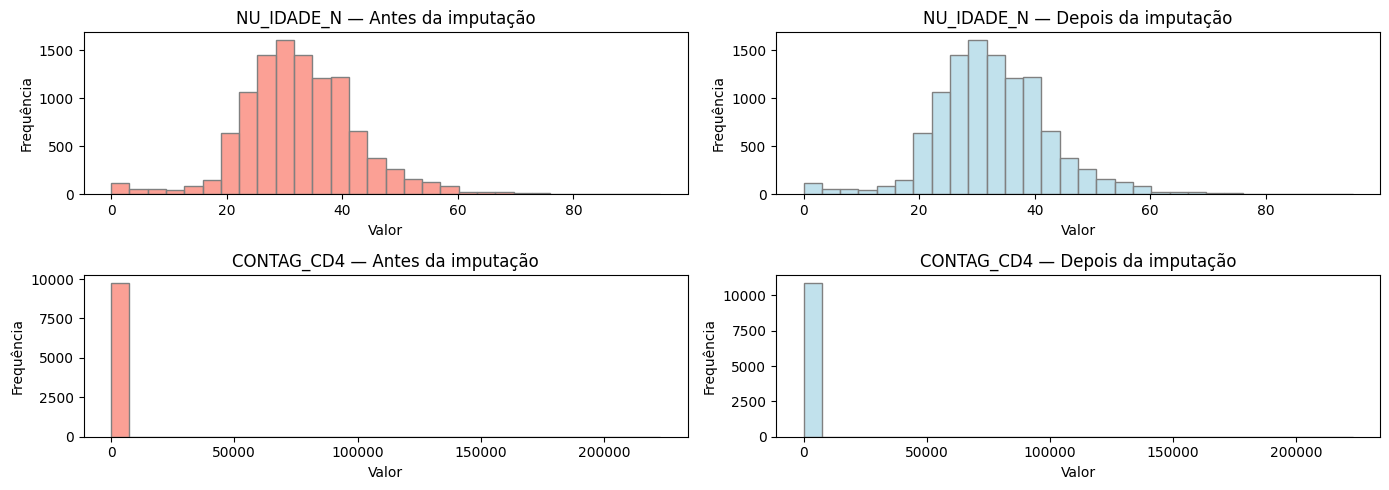

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [35]:
# 📊 Comparação visual da imputação — NU_IDADE_N e CONTAG_CD4
# ------------------------------------------------------------
# - Objetivo: verificar se a imputação distorceu a distribuição original.
# - Foco: variáveis numéricas críticas (idade e CD4).
# - Formato: histogramas antes vs depois da imputação.

import matplotlib.pyplot as plt
import seaborn as sns

vars_check = ["NU_IDADE_N", "CONTAG_CD4"]

fig, axes = plt.subplots(len(vars_check), 2, figsize=(14, 5), sharey=False)

for i, col in enumerate(vars_check):
    # Antes da imputação
    sns.histplot(base_mpox[col], bins=30, kde=False,
                 color="salmon", edgecolor="gray", ax=axes[i,0])
    axes[i,0].set_title(f"{col} — Antes da imputação")
    axes[i,0].set_xlabel("Valor")
    axes[i,0].set_ylabel("Frequência")

    # Depois da imputação
    sns.histplot(mpox_2022_prep[col], bins=30, kde=False,
                 color="lightblue", edgecolor="gray", ax=axes[i,1])
    axes[i,1].set_title(f"{col} — Depois da imputação")
    axes[i,1].set_xlabel("Valor")
    axes[i,1].set_ylabel("Frequência")

plt.tight_layout()
plt.show()


### 📊 Histograma com escala log apenas para CONTAG_CD4

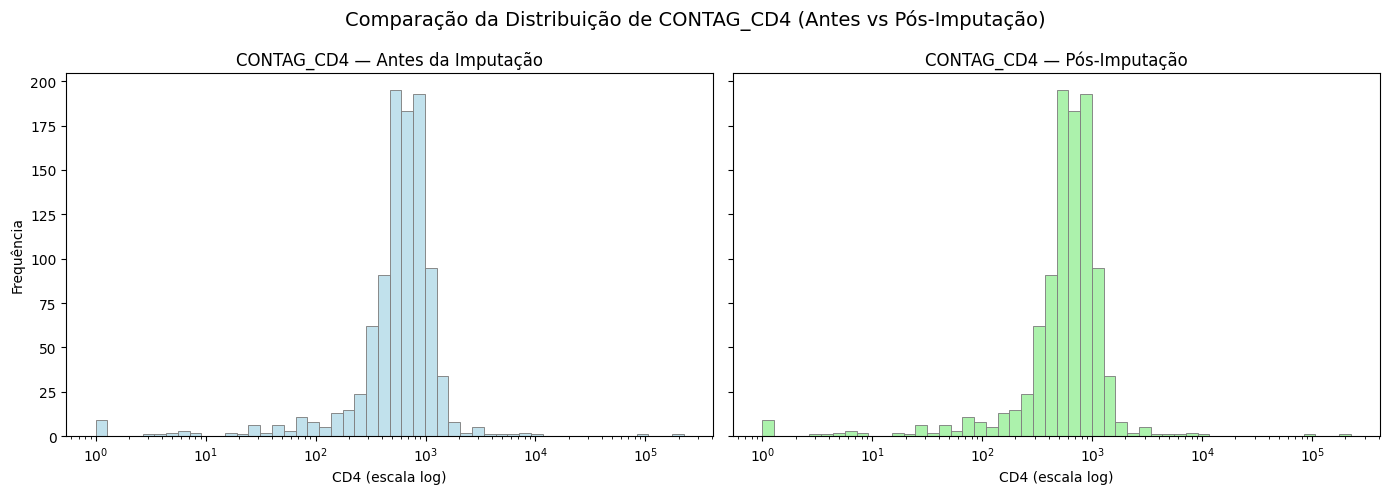

In [36]:
# 📊 Histogramas comparativos — CONTAG_CD4 (Antes vs Pós-Imputação)
# ------------------------------------------------------------------
# - Objetivo: visualizar como a imputação alterou a distribuição da variável CONTAG_CD4.
# - Comparação:
#     • Antes (base_mpox) → pode conter NaN e valores anômalos.
#     • Pós-Imputação (base_mpox_prep) → já com regra aplicada (mediana ou outra).
# - Log-scale no eixo X para evidenciar a cauda longa (valores extremos).
# - Interpretação:
#     • Espera-se que a distribuição mantenha a forma geral.
#     • A imputação deve "preencher buracos" sem distorcer drasticamente a curva.

import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")  # suprime warnings gráficos (apenas nesta célula)

fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Antes (dataset bruto)
sns.histplot(base_mpox["CONTAG_CD4"].dropna(), bins=50, log_scale=True,
             color="lightblue", edgecolor="gray", ax=axes[0])
axes[0].set_title("CONTAG_CD4 — Antes da Imputação", fontsize=12)
axes[0].set_xlabel("CD4 (escala log)")
axes[0].set_ylabel("Frequência")

# Pós-Imputação (dataset tratado)
sns.histplot(mpox_2022_prep["CONTAG_CD4"].dropna(), bins=50, log_scale=True,
             color="lightgreen", edgecolor="gray", ax=axes[1])
axes[1].set_title("CONTAG_CD4 — Pós-Imputação", fontsize=12)
axes[1].set_xlabel("CD4 (escala log)")
axes[1].set_ylabel("Frequência")

plt.suptitle("Comparação da Distribuição de CONTAG_CD4 (Antes vs Pós-Imputação)", fontsize=14)
plt.tight_layout()
plt.show()


#### Verificação de Dados Faltantes

O DataFrame passou por uma etapa rigorosa de limpeza e imputação, e atualmente não apresenta dados faltantes em variáveis críticas para análise.

**Nota:** Algumas células permanecem com valores ausentes por decisão metodológica, conforme recomendado na literatura especializada. Essas ausências foram mantidas intencionalmente para preservar a integridade estatística dos dados e evitar distorções nos modelos preditivos.

##### Levanta os dados faltantes

In [37]:
# Verifica se há '?' em cada coluna
(mpox_2022_prep == '?').sum()[ (mpox_2022_prep == '?').sum() > 0 ].to_frame(name='interrogacoes').T

""
interrogacoes


In [38]:
mpox_2022_prep.isnull().sum()[mpox_2022_prep.isnull().sum() > 0].to_frame(name='nulos').T

,DT_SIN_PRI,DT_COLETA,PROFIS_SAUDE,DATA_VACINA,DT_INTERNA,DT_EVOLUCAO,LOCAL_CONT
nulos,52,1438,9594,10920,10402,9932,9594


In [39]:
mpox_2022_prep.isna().sum()[mpox_2022_prep.isna().sum() > 0].to_frame(name='nulos').T

,DT_SIN_PRI,DT_COLETA,PROFIS_SAUDE,DATA_VACINA,DT_INTERNA,DT_EVOLUCAO,LOCAL_CONT
nulos,52,1438,9594,10920,10402,9932,9594


## Salva Dados Pré-processados em .csv (_#debug#_)
  Neste caso, pode-se notar, se houver, que os dados faltantes foram preenchidos, conforme técnica aplicada a cada variável.

In [40]:
Base_csv_file = 'mpox_2022_prep.csv'

#debug#
mpox_2022_prep.to_csv(Base_csv_file, index=False, mode='w') # Arquivo-base a ser tratado

---

## **⚙️ Engenharia de Atributos: criando novas variáveis a partir das existentes.**

---



    Resumo da ações:
      1. Explosão de SINTOMA → dummies (min_freq opcional; default preserva todos).
      2. Deltas de datas (sem imputar; respeita NaT).
      3. Agregados clínicos (ISTs, imuno, vacina).
      4. Bins demográficos (idade, região).
      5. Interações (ex.: imuno × sintomas, centralização de delay por região).
      6. Targets (hosp, óbito).
      7. Auditorias.


---


### Engenharia de Atributos — Funções

In [41]:
# ==========================================
# ⚙️ ENGENHARIA DE ATRIBUTOS — FUNÇÕES E EXECUÇÃO
# ==========================================
#import pandas as pd
#import numpy as np

# ------------------------------------------------------------
# 1) Explosão de sintomas em dummies (com min_freq opcional)
# ------------------------------------------------------------
def explode_sintoma_dummies_simple(
    df: pd.DataFrame,
    col: str = "SINTOMA",
    prefix: str = "sx_",
    min_freq: int | None = None
) -> tuple[pd.DataFrame, list]:
    """
    Transforma a coluna de sintomas (strings separadas por vírgula) em colunas dummies (0/1).

    Parâmetros
    ----------
    df : DataFrame
        Base de entrada.
    col : str
        Nome da coluna que contém a lista de sintomas (ex.: "Febre, Cefaleia").
    prefix : str
        Prefixo a ser usado nas colunas dummies geradas (ex.: "sx_").
    min_freq : int | None
        - None → mantém TODOS os sintomas (recomendado para saúde; preserva informação).
        - inteiro ≥1 → mantém apenas sintomas com frequência absoluta ≥ min_freq
                       (útil futuramente para reduzir esparsidade).

    Retorno
    -------
    df_out : DataFrame
        DataFrame original + colunas dummies para cada sintoma selecionado.
    sintomas_cols : list[str]
        Lista com os nomes das colunas de sintomas criadas.
    """
    df_out = df.copy()

    if col not in df_out.columns:
        return df_out, []

    # Lista de sintomas por linha (minúsculas, trim de espaços; ignora strings vazias)
    s_clean = df_out[col].fillna("").astype(str)
    listas = s_clean.str.split(",").apply(lambda xs: [t.strip().lower() for t in xs if t.strip() != ""])

    # Frequência dos termos
    freq = pd.Series([t for sub in listas for t in sub]).value_counts()

    # Seleção por min_freq (se None → todos)
    if min_freq is None:
        termos = freq.index
    else:
        termos = freq[freq >= int(min_freq)].index

    # Criação de dummies (0/1) linha a linha
    for termo in termos:
        c = f"{prefix}{termo.replace(' ', '_')}"
        df_out[c] = listas.apply(lambda L: int(termo in L)).astype("Int64")

    sintomas_cols = [c for c in df_out.columns if c.startswith(prefix)]
    return df_out, sintomas_cols


# ------------------------------------------------------------
# 2) Features derivadas de datas (sem imputar datas)
# ------------------------------------------------------------
def add_date_features(
    df: pd.DataFrame,
    col_notif: str = "DT_NOTIFIC",
    col_inicio: str = "DT_SIN_PRI",
    col_evol: str = "DT_EVOLUCAO",
    col_intern: str = "DT_INTERNA",
    create_missing_flags: bool = True
) -> pd.DataFrame:
    """
    Cria deltas de tempo (em dias) a partir de colunas de datas — sem imputação.
    Se a linha não tiver ambas as datas válidas, o delta fica NaN.

    Parâmetros
    ----------
    df : DataFrame
        Base de entrada (datas podem estar em string; serão convertidas durante o cálculo).
    col_notif, col_inicio, col_evol, col_intern : str
        Nomes das colunas de datas conforme o dicionário.
    create_missing_flags : bool
        Se True, mantém/gera indicadores *_missing (0/1) para cada coluna de data original.

    Retorno
    -------
    DataFrame com as colunas:
      - delay_notif        = DT_NOTIFIC - DT_SIN_PRI
      - tempo_internacao   = DT_EVOLUCAO - DT_INTERNA
      - duracao_caso       = DT_EVOLUCAO - DT_SIN_PRI
    """
    out = df.copy()

    # Flags de ausência (se existirem as colunas)
    def _flag(col):
        if create_missing_flags and col in out.columns:
            out[f"{col}_missing"] = out[col].isna().astype("Int64")

    for c in [col_notif, col_inicio, col_evol, col_intern]:
        _flag(c)

    # Converte sob demanda apenas para calcular deltas
    to_dt = lambda s: pd.to_datetime(s, errors="coerce", dayfirst=True)

    if {col_notif, col_inicio}.issubset(out.columns):
        out["delay_notif"] = (to_dt(out[col_notif]) - to_dt(out[col_inicio])).dt.days

    if {col_evol, col_intern}.issubset(out.columns):
        out["tempo_internacao"] = (to_dt(out[col_evol]) - to_dt(out[col_intern])).dt.days

    if {col_evol, col_inicio}.issubset(out.columns):
        out["duracao_caso"] = (to_dt(out[col_evol]) - to_dt(out[col_inicio])).dt.days

    return out


# ------------------------------------------------------------
# 3) Agregados clínicos (ISTs, imunossupressão, vacinação)
# ------------------------------------------------------------
def add_clinical_aggregates(
    df: pd.DataFrame,
    ist_cols: list | None = None,
    col_imuno: str = "PAC_IMUNOSSUP",
    col_vacina: str = "VACINA"
) -> pd.DataFrame:
    """
    Cria agregações clínicas:

    - ist_any   : 1 se pelo menos uma IST específica = 1; 0 caso contrário (ignora NaN ao somar/max).
    - ist_count : soma das ISTs específicas (contagem).
    - imune_risco:
        PAC_IMUNOSSUP (1,2,3) → 1; 4→0; outros (9/NaN) → NA.
    - vacina_qualquer:
        VACINA in {1,2,3} → 1; VACINA==4 → 0; caso contrário → NA.

    Parâmetros
    ----------
    df : DataFrame
    ist_cols : list | None
        Lista explícita de colunas de ISTs. Se None, usa o conjunto padrão do mpox_2022.
    col_imuno : str
        Nome da coluna de imunossupressão.
    col_vacina : str
        Nome da coluna de vacinação.

    Retorno
    -------
    DataFrame com novas colunas: ist_any, ist_count, imune_risco, vacina_qualquer.
    """
    out = df.copy()

    if ist_cols is None:
        ist_cols = [
            "GONORREIA","CLAMIDEA","SIFILIS","HERPES_GENITAL","CANCRO_MOLE",
            "TRICHOMOMAS_VAGINALS","LINFOGRANULOMA","MYCOPLASMA_GENITAL",
            "HPV","DIP","DONOVANOSE","HTLV","VERRUGA_GENITAL"
        ]
    ist_cols = [c for c in ist_cols if c in out.columns]

    if ist_cols:
        out["ist_any"] = out[ist_cols].max(axis=1, skipna=True).astype("Int64")
        out["ist_count"] = out[ist_cols].sum(axis=1, skipna=True).astype("Int64")

    if col_imuno in out.columns:
        m = out[col_imuno].map({1:1, 2:1, 3:1, 4:0})
        out["imune_risco"] = m.astype("Int64")

    if col_vacina in out.columns:
        v = pd.Series(pd.NA, index=out.index, dtype="Int64")
        v = v.mask(out[col_vacina].isin([1,2,3])==True, 1)
        v = v.mask(out[col_vacina].eq(4)==True, 0)
        out["vacina_qualquer"] = v

    return out


# ------------------------------------------------------------
# 4) Bins demográficos / Região (UF→região)
# ------------------------------------------------------------
def add_demo_bins(
    df: pd.DataFrame,
    col_idade: str = "NU_IDADE_N",
    col_uf: str = "SG_UF"
) -> pd.DataFrame:
    """
    Cria faixas etárias e região (a partir de SG_UF).
    - faixa_etaria: categorias textuais (0–9, 10–17, 18–29, 30–39, 40–49, 50–59, 60+).
      (Mantém NaN quando NU_IDADE_N ausente).
    - regiao: Norte, Nordeste, Centro-Oeste, Sudeste, Sul (NaN se SG_UF ausente ou desconhecido).

    Parâmetros
    ----------
    df : DataFrame
    col_idade : str
        Nome da coluna de idade (anos).
    col_uf : str
        Nome da coluna de UF (sigla).

    Retorno
    -------
    DataFrame com 'faixa_etaria' (category) e 'regiao' (category).
    """
    out = df.copy()

    # Faixas etárias (ajustáveis)
    if col_idade in out.columns:
        bins = [-np.inf, 9, 17, 29, 39, 49, 59, np.inf]
        labels = ["0-9","10-17","18-29","30-39","40-49","50-59","60+"]
        out["faixa_etaria"] = pd.cut(out[col_idade], bins=bins, labels=labels).astype("category")

    # Mapeamento UF → Região (IBGE)
    uf_regiao = {
        # Norte
        "AC":"Norte","AP":"Norte","AM":"Norte","PA":"Norte","RO":"Norte","RR":"Norte","TO":"Norte",
        # Nordeste
        "AL":"Nordeste","BA":"Nordeste","CE":"Nordeste","MA":"Nordeste","PB":"Nordeste",
        "PE":"Nordeste","PI":"Nordeste","RN":"Nordeste","SE":"Nordeste",
        # Centro-Oeste
        "DF":"Centro-Oeste","GO":"Centro-Oeste","MS":"Centro-Oeste","MT":"Centro-Oeste",
        # Sudeste
        "ES":"Sudeste","MG":"Sudeste","RJ":"Sudeste","SP":"Sudeste",
        # Sul
        "PR":"Sul","RS":"Sul","SC":"Sul",
    }
    if col_uf in out.columns:
        out["regiao"] = out[col_uf].map(uf_regiao).astype("category")

    return out


# ------------------------------------------------------------
# 5) Interações (exemplos pragmáticos)
# ------------------------------------------------------------
def add_interactions(
    df: pd.DataFrame,
    sintomas_prefix: str = "sx_",
    center_delay_by: str = "regiao"
) -> pd.DataFrame:
    """
    Cria interações/transformações simples:

    - sintoma_count: soma dos dummies de sintomas (se existirem colunas com prefixo sintomas_prefix).
    - imune_risco_x_sintomas: produto de imune_risco * sintoma_count (se ambas existirem).
    - delay_notif_centered_regiao: delay_notif centrado pela média da região (se 'regiao' existir).

    Parâmetros
    ----------
    df : DataFrame
    sintomas_prefix : str
        Prefixo que identifica as colunas dummies de sintomas (default 'sx_').
    center_delay_by : str
        Coluna categórica para centralizar delay_notif por grupo (default 'regiao').

    Retorno
    -------
    DataFrame com novas colunas se aplicáveis.
    """
    out = df.copy()

    # Conta dummies de sintomas
    sint_cols = [c for c in out.columns if c.startswith(sintomas_prefix)]
    if sint_cols:
        out["sintoma_count"] = out[sint_cols].sum(axis=1, skipna=True).astype("Int64")

    # Interação com imunossupressão
    if {"imune_risco","sintoma_count"}.issubset(out.columns):
        # Usa 0 para NA ao multiplicar; resultado volta a Int64 com NA onde ambos eram NA
        tmp = out["imune_risco"].fillna(0) * out["sintoma_count"].fillna(0)
        tmp = tmp.mask(out["imune_risco"].isna() & out["sintoma_count"].isna(), pd.NA)
        out["imune_risco_x_sintomas"] = tmp.astype("Int64")

    # Centralização de delay_notif por região (ou outra coluna categórica)
    if "delay_notif" in out.columns and center_delay_by in out.columns:
        out["delay_notif_centered_regiao"] = (
            out["delay_notif"] - out.groupby(center_delay_by)["delay_notif"].transform("mean")
        )

    return out


# ------------------------------------------------------------
# 6) Targets (variáveis-alvo binárias)
# ------------------------------------------------------------
def add_targets(
    df: pd.DataFrame,
    col_hosp: str = "HOSPITAL",
    col_evol: str = "EVOLUCAO"
) -> pd.DataFrame:
    """
    Cria variáveis-alvo padronizadas para classificação:

    - target_hosp      : 1 se HOSPITAL == 1; 0 caso contrário (Int64 com NA onde não há dado).
    - target_obito_any : 1 se EVOLUCAO ∈ {1 (óbito MPX), 3 (óbito outra causa)}; 0 caso contrário.
    - target_obito_mpx : 1 se EVOLUCAO == 1; 0 caso contrário.

    Parâmetros
    ----------
    df : DataFrame
    col_hosp : str
        Nome da coluna de hospitalização (código).
    col_evol : str
        Nome da coluna de evolução (código).

    Retorno
    -------
    DataFrame com as três colunas de target.
    """
    out = df.copy()

    if col_hosp in out.columns:
        t = out[col_hosp].eq(1)
        out["target_hosp"] = t.where(out[col_hosp].notna(), pd.NA).astype("Int64")

    if col_evol in out.columns:
        any_obito = out[col_evol].isin([1,3])
        out["target_obito_any"] = any_obito.where(out[col_evol].notna(), pd.NA).astype("Int64")
        mpx = out[col_evol].eq(1)
        out["target_obito_mpx"] = mpx.where(out[col_evol].notna(), pd.NA).astype("Int64")

    return out


# ------------------------------------------------------------
# 7) Auditorias
# ------------------------------------------------------------
def audit_sintomas(df: pd.DataFrame, sintomas_cols: list[str]) -> pd.DataFrame:
    """
    Auditoria das dummies de sintomas:
    - non_nulls, sum_positives, percent_positives
    - status: marca colunas sempre-zero / sempre-NaN
    """
    if not sintomas_cols:
        return pd.DataFrame({"msg": ["Sem colunas de sintomas (prefixo não encontrado)."]})

    audit = pd.DataFrame({
        "non_nulls": df[sintomas_cols].notna().sum(),
        "sum_positives": df[sintomas_cols].sum(),
        "percent_positives": df[sintomas_cols].mean() * 100
    })
    audit["status"] = "-"
    audit.loc[audit["sum_positives"] == 0, "status"] = "⚠️ Sempre 0"
    audit.loc[audit["non_nulls"] == 0, "status"] = "⚠️ Sempre NaN"
    return audit.sort_values("percent_positives", ascending=False)


def audit_feature_engineering(df: pd.DataFrame) -> pd.DataFrame:
    """
    Checagem rápida de presença e sanidade das principais novas features.
    Retorna um pequeno quadro-resumo (counts/NA/descrição de colunas-chave).
    """
    cols_check = [
        "delay_notif","tempo_internacao","duracao_caso",
        "ist_any","ist_count","imune_risco","vacina_qualquer",
        "faixa_etaria","regiao","sintoma_count","imune_risco_x_sintomas",
        "delay_notif_centered_regiao",
        "target_hosp","target_obito_any","target_obito_mpx"
    ]
    cols_check = [c for c in cols_check if c in df.columns]
    if not cols_check:
        return pd.DataFrame({"msg": ["Nenhuma coluna derivada encontrada para auditar."]})

    out = []
    for c in cols_check:
        s = df[c]
        out.append({
            "col": c,
            "dtype": str(s.dtype),
            "non_null": int(s.notna().sum()),
            "na": int(s.isna().sum()),
            "unique": int(s.nunique(dropna=True)),
            "sample_values": s.dropna().unique()[:5] if s.nunique(dropna=True) <= 10 else "many"
        })
    return pd.DataFrame(out).set_index("col")

### **Estrutura de Execução (orquestra todas as etapas)**

Neste momento como ainda está-se a explorar e atuar na Engenharia de Atributos, melhor manter todos os dummies de sintomas

In [42]:
# ------------------------------------------------------------
# 8) PIPELINE DE EXECUÇÃO (orquestra todas as etapas)
# ------------------------------------------------------------
def run_feature_engineering_pipeline(
    df: pd.DataFrame,
    sintomas_min_freq: int | None = None
) -> tuple[pd.DataFrame, dict]:
    """
    Executa a Engenharia de Atributos end-to-end:

    Etapas:
      1. Explosão de SINTOMA → dummies (min_freq opcional; default preserva todos).
      2. Deltas de datas (sem imputar; respeita NaT).
      3. Agregados clínicos (ISTs, imuno, vacina).
      4. Bins demográficos (idade, região).
      5. Interações (ex.: imuno × sintomas, centralização de delay por região).
      6. Targets (hosp, óbito).
      7. Auditorias.

    Parâmetros
    ----------
    df : DataFrame
        DataFrame pós-imputação/limpeza.
    sintomas_min_freq : int | None
        Cutoff para filtrar sintomas raros (None = mantém todos).

    Retorno
    -------
    df_feat : DataFrame
        DataFrame final enriquecido com todas as features derivadas.
    info : dict
        Dicionário com artefatos úteis:
          - 'sintomas_cols': lista de colunas dummies geradas
          - 'audit_sintomas': DataFrame de auditoria de sintomas
          - 'audit_features': DataFrame de auditoria final de features
    """
    # 1) Sintomas → dummies
    df1, sx_cols = explode_sintoma_dummies_simple(df, col="SINTOMA", prefix="sx_", min_freq=sintomas_min_freq)

    # 2) Datas → deltas
    df2 = add_date_features(df1)

    # 3) Agregados clínicos
    df3 = add_clinical_aggregates(df2)

    # 4) Bins demográficos / região
    df4 = add_demo_bins(df3)

    # 5) Interações
    df5 = add_interactions(df4)

    # 6) Targets
    df_feat = add_targets(df5)

    # 7) Auditorias
    audit_sx = audit_sintomas(df_feat, sx_cols)
    audit_ft = audit_feature_engineering(df_feat)

    info = {
        "sintomas_cols": sx_cols,
        "audit_sintomas": audit_sx,
        "audit_features": audit_ft
    }
    return df_feat, info


# ==========================================
# 🚀 EXECUÇÃO REAL NO DATAFRAME
# (assume que já existe mpox_2022_prep como df pós-imputação)
# ==========================================
df0 = mpox_2022_prep.copy()

# ► Mantém todos os sintomas (literatura/consenso: preservar informação clínica agora)
df_feateng, fe_info = run_feature_engineering_pipeline(df0, sintomas_min_freq=None)

print("\n✔️ Engenharia de atributos concluída:")
print("\nTotal de colunas:", df_feateng.shape[1])
print("Total de linhas :", df_feateng.shape[0])



✔️ Engenharia de atributos concluída:

Total de colunas: 222
Total de linhas : 10920


## **⚙️ Auditoria Pós-Engenharia de Dados**

In [43]:
# Amostra de auditorias
print("\n✔️ Resultado da Auditoria Pós-Engenharia de Dados:")
print("\n[Audit] Dummies de sintomas (top 10 por % positivos):")
print(fe_info["audit_sintomas"].head(10))

print("\n[Audit] Quadro-resumo de features derivadas:")
print(fe_info["audit_features"],'\n')


✔️ Resultado da Auditoria Pós-Engenharia de Dados:

[Audit] Dummies de sintomas (top 10 por % positivos):
                    non_nulls  sum_positives  percent_positives status
sx_erupcao_cutanea      10920           7319           67.02381      -
sx_febre                10920           6288          57.582418      -
sx_lesao_genital        10920           4785          43.818681      -
sx_cefaleia             10920           4287          39.258242      -
sx_adenomegalia         10920           3809          34.880952      -
sx_dor_muscular         10920           3551          32.518315      -
sx_astenia              10920           3348          30.659341      -
sx_fraqueza             10920           3219          29.478022      -
sx_lesao_anal           10920           2335          21.382784      -
sx_dor_nas_costas       10920           1946          17.820513      -

[Audit] Quadro-resumo de features derivadas:
                               dtype  non_null     na  unique samp

## 📊 Verificação de Distribuição dos Targets após Engenharia de Atributos

Distribuição (%) de:

target_hosp: {np.int64(0): 97.32, np.int64(1): 2.68}
target_obito_any: {np.int64(0): 99.74, np.int64(1): 0.26}
target_obito_mpx: {np.int64(0): 99.87, np.int64(1): 0.13}


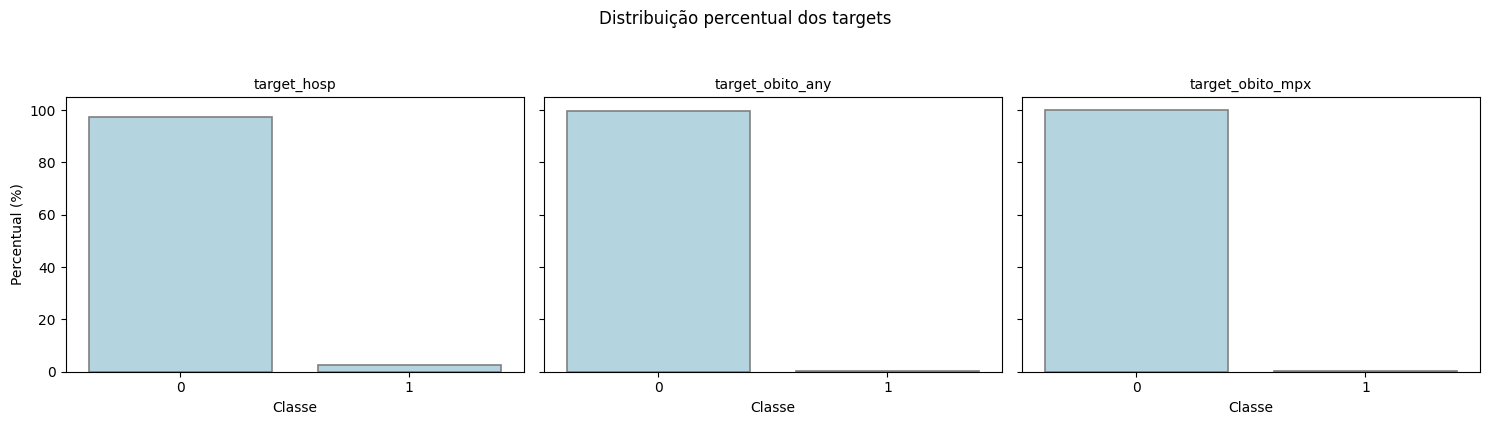

In [44]:
# 📊 Distribuição percentual dos targets + gráficos lado a lado (Seaborn)
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de possíveis targets
targets = ["target_hosp", "target_obito_any", "target_obito_mpx"]

# Impressão no console (percentuais simplificados)
print(f"Distribuição (%) de:\n")
for t in targets:
    if t in df_feateng.columns:
        counts = (df_feateng[t].value_counts(normalize=True) * 100).round(2)
        distrib_dict = counts.to_dict()

        print(f"{t}: {distrib_dict}")

# Preparar dados em formato longo para o seaborn
plot_data = []
for t in targets:
    if t in df_feateng.columns:
        counts = (df_feateng[t].value_counts(normalize=True) * 100).round(2)
        for cls, val in counts.items():
            plot_data.append({"Target": t, "Classe": str(cls), "Percentual": val})

df_plot = pd.DataFrame(plot_data)

# Plot com seaborn — um subplot por target
n = df_plot["Target"].nunique()
fig, axes = plt.subplots(1, n, figsize=(5*n, 4), sharey=True)

if n == 1:  # garante que axes seja iterável mesmo com 1 target
    axes = [axes]

for ax, target in zip(axes, df_plot["Target"].unique()):
    sns.barplot(
        data=df_plot[df_plot["Target"] == target],
        x="Classe", y="Percentual",
        color="lightblue", edgecolor="gray", linewidth=1.2, ax=ax
    )
    ax.set_title(f"{target}", fontsize=10)
    ax.set_ylabel("Percentual (%)")
    ax.set_xlabel("Classe")

plt.suptitle("Distribuição percentual dos targets", fontsize=12, y=1.05)
plt.tight_layout()
plt.show()


## 💾 Salvamento Final da Base Pós-Engenharia de Atributos

In [45]:
# 💾 Salvamento final da base pós-engenharia de atributos
output_path = "mpox_2022_feateng.csv"
df_feateng.to_csv(output_path, index=False, encoding="utf-8")
print(f"✔️ Arquivo salvo em: {output_path}")

# 🔍 Verificação pós-salvamento (recarrega e confere shape + distribuição dos targets)
df_check = pd.read_csv(output_path)
print("\nCarregado de volta com sucesso:", df_check.shape)

# Lista de possíveis targets
targets = ["target_hosp", "target_obito_any", "target_obito_mpx"]

for t in targets:
    if t in df_check.columns:
        counts = (df_check[t].value_counts(normalize=True) * 100).round(2)
        distrib_dict = counts.to_dict()
        print(f"Distribuição (%) de {t}: {distrib_dict}")


✔️ Arquivo salvo em: mpox_2022_feateng.csv

Carregado de volta com sucesso: (10920, 222)
Distribuição (%) de target_hosp: {0: 97.32, 1: 2.68}
Distribuição (%) de target_obito_any: {0: 99.74, 1: 0.26}
Distribuição (%) de target_obito_mpx: {0: 99.87, 1: 0.13}


---
##🧹 **Seleção de Atributos — Resumo das Ações**

---

- ✂️ Elimina:

  - Variáveis de datas (`DT_*`),  
  - Identificadores técnicos (`__arquivo_origem__`),  
  - Texto livre cru (`OUTRO_DES`).  

- 📉 Aplica filtro de variância:
  - Remove variáveis numéricas com variância < 1% (sem poder discriminativo:
              `VarianceThreshold(threshold=0.01)`).  

- 🎯 Mantém:
  - Variáveis categóricas para uso em **codificadores** (LabelEncoder / OneHotEncoder).

🧑 Esclarecimento

Filtro de variância:
- A variância de uma feature é uma medida estatística que indica o quanto os valores dessa variável se dispersam em relação à média.

- Atributos com baixa variância tendem a ser pouco informativos, pois não ajudam a distinguir entre diferentes classes ou padrões nos dados.

- Objetivo do filtro é melhorar a qualidade dos dados antes de aplicar algoritmos de aprendizado.

    “Features that do not vary much across the dataset are unlikely to be useful for prediction and can be removed during preprocessing.” — Kelleher et al., 2nd Ed.

In [46]:
# 1. Seleção de Atributos — Remoção inicial de inviáveis + filtro de variância

#import pandas as pd
#from sklearn.feature_selection import VarianceThreshold

# Carrega o dataset pós-engenharia de atributos
df_feateng = pd.read_csv("mpox_2022_feateng.csv")

print(f"[0] Dataset carregado com {df_feateng.shape[1]} variáveis")

print("\nTotal de variáveis após:\n")
# --------------------------
# A) Remover variáveis inviáveis
# --------------------------
inviaveis = [
    "__arquivo_origem__",   # identificador técnico
    "OUTRO_DES"             # texto livre cru (já não entra em modelagem)
] + [c for c in df_feateng.columns if c.startswith("DT_")]  # datas puras

df_reduced = df_feateng.drop(columns=[c for c in inviaveis if c in df_feateng.columns])

print(f"[1] Após remoção de inviáveis: {df_reduced.shape[1]} variáveis")

# --------------------------
# B) Filtro de variância
# --------------------------
sel = VarianceThreshold(threshold=0.01)  # <1% de variância → descartar
sel.fit(df_reduced.select_dtypes(include=["int64","float64"]))

variaveis_ok = df_reduced.select_dtypes(include=["int64","float64"]).columns[sel.get_support()]
df_atribsel = df_reduced[variaveis_ok.tolist() + df_reduced.select_dtypes(include=["object"]).columns.tolist()]

print(f"\n[2] Após filtro de variância: {df_atribsel.shape[1]} variáveis")

[0] Dataset carregado com 222 variáveis

Total de variáveis após:

[1] Após remoção de inviáveis: 210 variáveis

[2] Após filtro de variância: 87 variáveis


Filtro semântico


In [47]:
# --------------------------
# C) 🔎 Filtro semântico/manual — remoção de variáveis redundantes (após filtro estatístico)
# --------------------------
#
redundant_cols = [
    "SG_UF", "CO_UF_RES"  # exemplo redundância semântica com UF
    # adiciona outras colunas redundantes aqui
]

df_atribsel = df_atribsel.drop(columns=[c for c in redundant_cols if c in df_atribsel.columns])

print(f"✅ Variáveis redundantes removidas. Total atual: {df_atribsel.shape[1]} colunas")


✅ Variáveis redundantes removidas. Total atual: 85 colunas


## 📊 Diagnóstico de correlação (apenas numéricas reais/discretas)

In [48]:
# 📊 Diagnóstico de correlação (apenas numéricas reais/discretas)
def corr_diag_numeric_only(df, threshold=0.9):
    """
    Apenas avalia correlação em colunas numéricas contínuas/discretas.
    Não remove nada — só retorna pares correlacionados.
    """
    num_df = df.select_dtypes(include=["number"])
    corr_matrix = num_df.corr().abs()

    high_corr = [
        (i, j, corr_matrix.loc[i, j])
        for i in corr_matrix.columns
        for j in corr_matrix.columns
        if i != j and corr_matrix.loc[i, j] > threshold
    ]

    return sorted(high_corr, key=lambda x: -x[2])



# ▶️ Execução: Diagnóstico de alta correlação em variáveis numéricas (pré-encoding)

high_corr_pairs = corr_diag_numeric_only(df_atribsel, threshold=0.9)

if not high_corr_pairs:
    print("\n✅ Nenhuma correlação forte encontrada entre variáveis numéricas.")
else:
    print(f"\n⚠️ Total de {len(high_corr_pairs)} pares de variáveis altamente correlacionadas encontrados.")
    print("\n[Diagnóstico] Pares de variáveis altamente correlacionadas (>0.9):")
    for i, j, corr in high_corr_pairs:
      print(f" - {i} vs {j}: {corr:.2f}")
print('\n')


⚠️ Total de 38 pares de variáveis altamente correlacionadas encontrados.

[Diagnóstico] Pares de variáveis altamente correlacionadas (>0.9):
 - PROFIS_SAUDE_missing vs LOCAL_CONT_missing: 1.00
 - LOCAL_CONT_missing vs PROFIS_SAUDE_missing: 1.00
 - TRANSM_missing vs CONTAT_ANIMAL_missing: 1.00
 - TRANSM_missing vs CARACT_GENOMICA_missing: 1.00
 - TRANSM_missing vs CLADO_missing: 1.00
 - CONTAT_ANIMAL_missing vs TRANSM_missing: 1.00
 - CONTAT_ANIMAL_missing vs CARACT_GENOMICA_missing: 1.00
 - CONTAT_ANIMAL_missing vs CLADO_missing: 1.00
 - CARACT_GENOMICA_missing vs TRANSM_missing: 1.00
 - CARACT_GENOMICA_missing vs CONTAT_ANIMAL_missing: 1.00
 - CARACT_GENOMICA_missing vs CLADO_missing: 1.00
 - CLADO_missing vs TRANSM_missing: 1.00
 - CLADO_missing vs CONTAT_ANIMAL_missing: 1.00
 - CLADO_missing vs CARACT_GENOMICA_missing: 1.00
 - delay_notif vs delay_notif_centered_regiao: 1.00
 - delay_notif_centered_regiao vs delay_notif: 1.00
 - PAC_IMUNOSSUP vs imune_risco: 1.00
 - imune_risco vs 

## Salva dados Pós-Seleção de Atributos

In [49]:
# --------------------------
# Exporta versão reduzida
# --------------------------
out_path = "mpox_2022_atribsel.csv"
df_atribsel.to_csv(out_path, index=False)
print(f"\n[3] Dataset salvo como: {out_path}\n")


[3] Dataset salvo como: mpox_2022_atribsel.csv



##📌 Fluxo recapitulando:

1. `df_feateng` → saída da Engenharia de Atributos.

2. `df_atribsel` → após seleção inicial (remoção de inviáveis + filtro de variância + filtro semântico/manual).


---
## **Atividade 3: Codificação de variáveis categóricas (OrdinalEncoder e OneHotEncoder)**
---

-  Como não se tem variáveis categóricas ordinais, somente OneHotEncoder será **utilizado**

### **Codificação OneHotEncoder**

In [50]:
# 1) Codificação de variáveis categóricas (One-Hot)
from sklearn.preprocessing import OneHotEncoder

# Usa vetores já definidos (garantem todas categóricas relevantes)
onehot_cols = [c for c in df_atribsel.columns
               if c in nominal_categorical_cols
               or c in numerical_as_nominal_categ_cols]

# Inicializa encoder
encoder = OneHotEncoder(drop='first', sparse_output=False, dtype=int, handle_unknown='ignore')

# Aplica transform
encoded = encoder.fit_transform(df_atribsel[onehot_cols])

# Converte para DataFrame
encoded_df = pd.DataFrame(encoded,
                          columns=encoder.get_feature_names_out(onehot_cols),
                          index=df_atribsel.index)

# Junta e remove originais
df_encoded = pd.concat([df_atribsel.drop(columns=onehot_cols), encoded_df], axis=1)

print("[Encoding] Dataset final:", df_encoded.shape)
print("[Encoding] Categóricas originais:", len(onehot_cols))
print("[Encoding] Variáveis após OneHot:", encoded_df.shape[1])


[Encoding] Dataset final: (10920, 1392)
[Encoding] Categóricas originais: 30
[Encoding] Variáveis após OneHot: 1337


## Auditoria Pós-codificação de Variáveis Categóricas

In [51]:
# 2) Auditoria pós-codificação
print("=== Auditoria Pós-codificação de Variáveis Categóricas ===")

# Total de colunas antes e depois
print(f"- Total antes da codificação: {df_atribsel.shape[1]}")
print(f"- Total depois da codificação: {df_encoded.shape[1]}")

# Conferir se não há mais colunas categóricas "cruas"
restantes_cat = df_encoded.select_dtypes(include=['object', 'category']).columns
if len(restantes_cat) > 0:
    print("⚠️ Restaram colunas categóricas sem codificação:", list(restantes_cat))
else:
    print("✅ Todas as categóricas foram codificadas.")

# Conferir tipos predominantes
print("\nDtypes principais no dataset final:")
print(df_encoded.dtypes.value_counts())

# Conferir presença de NaNs
nulos = df_encoded.isna().sum().sum()
print(f"\nValores ausentes após codificação: {nulos}")


=== Auditoria Pós-codificação de Variáveis Categóricas ===
- Total antes da codificação: 85
- Total depois da codificação: 1392
⚠️ Restaram colunas categóricas sem codificação: ['SINTOMA', 'faixa_etaria', 'regiao']

Dtypes principais no dataset final:
int64      1383
float64       6
object        3
Name: count, dtype: int64

Valores ausentes após codificação: 29490


## ▶️ **Filtro de Alta Correlação Pós-codificação**

In [52]:
# 3) Filtro de Alta Correlação Pós-codificação
import numpy as np

def drop_high_corr(df, threshold=0.9):
    """
    Remove variáveis altamente correlacionadas.

    Parâmetros:
    - df : DataFrame (numérico, já codificado)
    - threshold : float (correlação acima desse valor será considerada redundante)

    Retorna:
    - df_reduced : DataFrame sem colunas redundantes
    - dropped : lista de colunas removidas
    """
    # Seleciona apenas numéricas (evita erro com datas)
    num_df = df.select_dtypes(include=[np.number])

    # Calcula matriz de correlação
    corr = num_df.corr().abs()

    # Seleciona parte triangular superior
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

    # Colunas a remover
    to_drop = [col for col in upper.columns if any(upper[col] > threshold)]

    df_reduced = df.drop(columns=to_drop, errors="ignore")
    return df_reduced, to_drop


# ▶️ Aplicação: no df_encoded (já pós-codificação)
df_atribsel_uncorr, dropped_corr = drop_high_corr(df_encoded, threshold=0.9)

print(f"[Filtro de Alta Correlação] Colunas removidas: {len(dropped_corr)}")
print("Exemplo de colunas removidas:", dropped_corr[:10])
print("Shape final:", df_atribsel_uncorr.shape)


[Filtro de Alta Correlação] Colunas removidas: 373
Exemplo de colunas removidas: ['LOCAL_CONT_missing', 'CONTAT_ANIMAL_missing', 'CARACT_GENOMICA_missing', 'CLADO_missing', 'CONTAG_CD4_missing', 'sx_fraqueza', 'sx_sudorese', 'sx_outros', 'sx_vomito', 'ist_any']
Shape final: (10920, 1019)


## Auditoria Pós-filtro de Alta Correlação

In [53]:
# Auditoria pós-correlação

print("=== Auditoria Pós-Correlação ===")
print(f"- Total de colunas antes: {df_encoded.shape[1]}")
print(f"- Total de colunas depois: {df_atribsel_uncorr.shape[1]}")
print(f"- Colunas removidas por alta correlação: {len(dropped_corr)}")

if dropped_corr:
    print("\n⚠️ Lista das primeiras colunas removidas:\n", dropped_corr[:15])
else:
    print("\n✅ Nenhuma coluna altamente correlacionada foi removida.")

# Conferir se restaram colunas categóricas (não deveria)
restantes_cat = df_atribsel_uncorr.select_dtypes(include=['object', 'category']).columns
if len(restantes_cat) > 0:
    print("\n⚠️ Restaram colunas categóricas:\n", list(restantes_cat))
else:
    print("\n✅ Apenas numéricas, pronto para escalonamento.")

print('\n')

=== Auditoria Pós-Correlação ===
- Total de colunas antes: 1392
- Total de colunas depois: 1019
- Colunas removidas por alta correlação: 373

⚠️ Lista das primeiras colunas removidas:
 ['LOCAL_CONT_missing', 'CONTAT_ANIMAL_missing', 'CARACT_GENOMICA_missing', 'CLADO_missing', 'CONTAG_CD4_missing', 'sx_fraqueza', 'sx_sudorese', 'sx_outros', 'sx_vomito', 'ist_any', 'ist_count', 'delay_notif_centered_regiao', 'ID_MUNICIP_410580', 'ID_MN_RESI_110012', 'ID_MN_RESI_110020']

⚠️ Restaram colunas categóricas:
 ['SINTOMA', 'faixa_etaria', 'regiao']




##📌 Fluxo recapitulando:

1. `df_atribsel_uncorr` → após remover variáveis altamente correlacionadas - este é o que se utilizará na Codificação (Encoding).

---
## **Atividade 4: Escalonamento de variáveis numéricas (StandardScaler e MinMaxScaler)**

##### Percepção analítica: "Idade tem muitos outliers em 80+, mas o StandardScaler reduz o impacto no treino do modelo, enquanto o MinMax preserva os extremos comprimidos em 1."
---

### 📊 Boxplots — Antes do Escalonamento


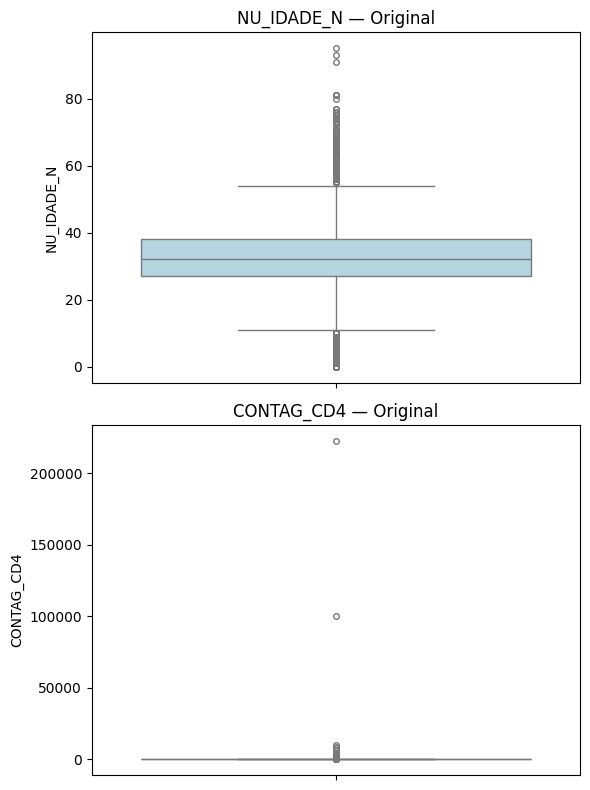

In [54]:
# 📊 Boxplots — Antes do Escalonamento
# -------------------------------------
# - Objetivo: visualizar a distribuição original das variáveis numéricas.
# - Variáveis: numéricas contínuas/discretas (não-categóricas).

import matplotlib.pyplot as plt
import seaborn as sns

num_cols = numerical_discrete_cols
X_num = df_atribsel_uncorr[num_cols].copy()

fig, axes = plt.subplots(len(num_cols), 1, figsize=(6, 4*len(num_cols)))

for i, col in enumerate(num_cols):
    sns.boxplot(y=X_num[col], ax=axes[i], color="lightblue", fliersize=4, linewidth=1)
    axes[i].set_title(f"{col} — Original")

plt.tight_layout()
plt.show()


### **Escalonamento StandardScaler**

In [55]:
# 4.1) Escalonamento de variáveis numéricas — StandardScaler
from sklearn.preprocessing import StandardScaler

def scale_with_standard(df):
    """
    Aplica StandardScaler (z-score) às variáveis numéricas.
    Retorna:
    - df_scaled_std : dataframe escalonado
    - num_cols : lista de colunas numéricas escalonadas
    """
    num_cols = df.select_dtypes(include=[np.number]).columns
    scaler = StandardScaler()

    df_scaled_std = df.copy()
    df_scaled_std[num_cols] = scaler.fit_transform(df[num_cols])

    return df_scaled_std, num_cols


# ▶️ Execução 4.1
df_scaled_std, num_cols_std = scale_with_standard(df_atribsel_uncorr)
print(f"[4.1] StandardScaler aplicado em {len(num_cols_std)} variáveis numéricas.\n")


[4.1] StandardScaler aplicado em 1016 variáveis numéricas.



### Auditoria Pós-Escalonamento — StandardScaler

In [56]:
# Auditoria 4.1 — StandardScaler
def audit_standard_scaling(df_original, df_scaled, cols):
    """
    Verifica se StandardScaler funcionou:
    - média ≈ 0
    - desvio padrão ≈ 1
    """
    audit = {}
    for col in cols:
        sc = df_scaled[col]
        audit[col] = {
            "mean_scaled": float(sc.mean()),
            "std_scaled": float(sc.std())
        }
    return pd.DataFrame(audit).T

audit_std = audit_standard_scaling(df_atribsel_uncorr, df_scaled_std, num_cols_std)
print(audit_std.head(), '\n')


                    mean_scaled  std_scaled
NU_IDADE_N        -1.704782e-16    1.000046
SIFILIS            5.205441e-18    1.000046
CONTAG_CD4        -7.808162e-18    1.000046
SINTOMA_missing   -1.041088e-17    1.000046
OUTRO_DES_missing  1.353415e-16    1.000046 



### 📊 Boxplots — Pós-StandardScaler

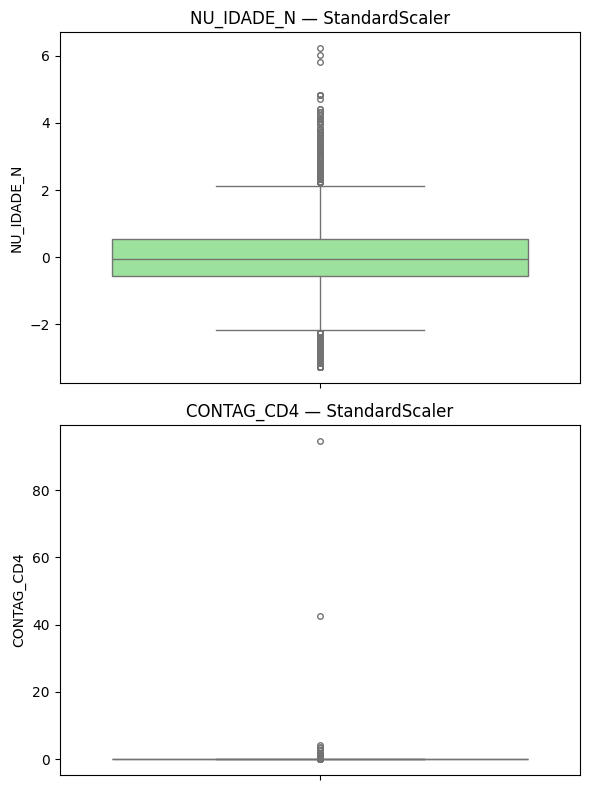

In [57]:
# 📊 Boxplots — Pós-StandardScaler
# --------------------------------
# - Objetivo: comparar as distribuições após centralização e normalização
#   (média = 0, desvio padrão = 1).
# - Útil em modelos que assumem normalidade ou sensibilidade à variância.

from sklearn.preprocessing import StandardScaler

X_std = pd.DataFrame(StandardScaler().fit_transform(X_num),
                     columns=num_cols, index=X_num.index)

fig, axes = plt.subplots(len(num_cols), 1, figsize=(6, 4*len(num_cols)))

for i, col in enumerate(num_cols):
    sns.boxplot(y=X_std[col], ax=axes[i], color="lightgreen", fliersize=4, linewidth=1)
    axes[i].set_title(f"{col} — StandardScaler")

plt.tight_layout()
plt.show()


### **Escalonamento de variáveis numéricas — MinMaxScaler**

In [58]:
# 4.2) Escalonamento de variáveis numéricas — MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

def scale_with_minmax(df):
    """
    Aplica MinMaxScaler [0,1] às variáveis numéricas.
    Retorna:
    - df_scaled_mm : dataframe escalonado
    - num_cols : lista de colunas numéricas escalonadas
    """
    num_cols = df.select_dtypes(include=[np.number]).columns
    scaler = MinMaxScaler()

    df_scaled_mm = df.copy()
    df_scaled_mm[num_cols] = scaler.fit_transform(df[num_cols])

    return df_scaled_mm, num_cols


# ▶️ Execução 4.2
df_scaled_mm, num_cols_mm = scale_with_minmax(df_atribsel_uncorr)
print(f"[4.2] MinMaxScaler aplicado em {len(num_cols_mm)} variáveis numéricas.")


[4.2] MinMaxScaler aplicado em 1016 variáveis numéricas.


 ### Auditoria Pós-Escalonamento — MinMaxScaler

In [59]:
# Auditoria 4.2 — MinMaxScaler
def audit_minmax_scaling(df_original, df_scaled, cols):
    """
    Verifica se MinMaxScaler funcionou:
    - min = 0
    - max = 1
    """
    audit = {}
    for col in cols:
        sc = df_scaled[col]
        audit[col] = {
            "min_scaled": float(sc.min()),
            "max_scaled": float(sc.max())
        }
    return pd.DataFrame(audit).T

audit_mm = audit_minmax_scaling(df_atribsel_uncorr, df_scaled_mm, num_cols_mm)
print(audit_mm.head())


                   min_scaled  max_scaled
NU_IDADE_N                0.0         1.0
SIFILIS                   0.0         1.0
CONTAG_CD4                0.0         1.0
SINTOMA_missing           0.0         1.0
OUTRO_DES_missing         0.0         1.0


### 📊 Boxplots — Pós-MinMaxScaler

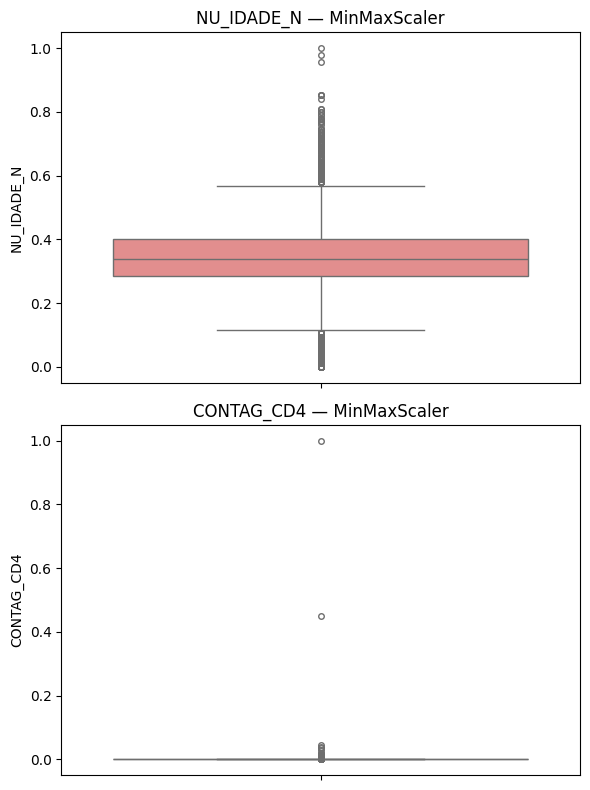

In [60]:
# 📊 Boxplots — Pós-MinMaxScaler
# -------------------------------
# - Objetivo: visualizar como as variáveis foram reescaladas para [0,1].
# - Útil em modelos sensíveis à magnitude absoluta (ex.: KNN, redes neurais).

from sklearn.preprocessing import MinMaxScaler

X_minmax = pd.DataFrame(MinMaxScaler().fit_transform(X_num),
                        columns=num_cols, index=X_num.index)

fig, axes = plt.subplots(len(num_cols), 1, figsize=(6, 4*len(num_cols)))

for i, col in enumerate(num_cols):
    sns.boxplot(y=X_minmax[col], ax=axes[i], color="lightcoral", fliersize=4, linewidth=1)
    axes[i].set_title(f"{col} — MinMaxScaler")

plt.tight_layout()
plt.show()


### 📊 Estatísticas comparativas — Antes, Pós-StandardScaler e Pós-MinMaxScaler

In [61]:
# 📊 Estatísticas comparativas — formato matricial por estágio
# -----------------------------------------------------------------------------
# - Agora o dataframe é organizado em blocos:
#     Antes   → Média, Desvio, Min, Max
#     Std     → Média, Desvio, Min, Max
#     MinMax  → Média, Desvio, Min, Max
# - Mais intuitivo para leitura, pois cada estágio aparece agrupado.
# -----------------------------------------------------------------------------

def resumo_stats_matriz(df_before, df_std, df_mm, num_cols):
    stats = {}
    for col in num_cols:
        stats[col] = {
            ("Antes", "Média"):  df_before[col].mean(),
            ("Antes", "Desvio"): df_before[col].std(),
            ("Antes", "Min"):    df_before[col].min(),
            ("Antes", "Max"):    df_before[col].max(),

            ("Pós-Std", "Média"):  df_std[col].mean(),
            ("Pós-Std", "Desvio"): df_std[col].std(),
            ("Pós-Std", "Min"):    df_std[col].min(),
            ("Pós-Std", "Max"):    df_std[col].max(),

            ("Pós-MinMax", "Média"):  df_mm[col].mean(),
            ("Pós-MinMax", "Desvio"): df_mm[col].std(),
            ("Pós-MinMax", "Min"):    df_mm[col].min(),
            ("Pós-MinMax", "Max"):    df_mm[col].max(),
        }

    df_stats = pd.DataFrame(stats).T.round(3)
    df_stats.columns = pd.MultiIndex.from_tuples(df_stats.columns)  # cria hierarquia
    return df_stats


# ▶️ Executa no teu caso
comparativo_stats_matriz = resumo_stats_matriz(df_atribsel, df_scaled_std, df_scaled_mm, num_cols)

print("=== Estatísticas comparativas ===")
display(comparativo_stats_matriz)


=== Estatísticas comparativas ===


Antes                          Pós-Std                        \
             Média    Desvio  Min       Max   Média Desvio    Min     Max   
NU_IDADE_N  32.652    10.023  0.0      95.0    -0.0    1.0 -3.258   6.221   
CONTAG_CD4  93.436  2352.481  0.0  222781.0    -0.0    1.0 -0.040  94.665   

           Pós-MinMax                   
                Média Desvio  Min  Max  
NU_IDADE_N      0.344  0.106  0.0  1.0  
CONTAG_CD4      0.000  0.011  0.0  1.0

##📌 Fluxo recapitulando:

- Gera variáveis numéricas escaladas via:

  - 1. StandardScaler: gera `df_scaled_std`.

      - Esperado: média ≈ 0, desvio padrão ≈ 1.

  - 2. MinMaxScaler: gera `df_scaled_mm`.

      - Esperado: min=0, max=1.

- Auditorias confirmam consistência.

---

## **Divisão de preditoras (X) e alvo (y)**

---

In [62]:
# 5.0 Divisão de preditoras (X) e alvo (y)
# ----------------------------------------
# - Objetivo: separar features (X) e variável-alvo (y).
# - Aqui você escolhe QUAL alvo quer balancear (hospitalização ou óbito).
# - Pré-requisito: df_encoded (ou df_enc) já codificado (OneHot) e sem colunas não-numéricas.
# - Observação: por ora, vamos seguir com 'target_hosp'; depois você pode trocar pelo alvo de óbito.

import pandas as pd

# Escolhe o alvo aqui:
target_col = "target_hosp"   # alternativas: "target_obito_any", "target_obito_mpx" (se existirem)

# Verificações básicas
assert target_col in df_encoded.columns, f"Alvo '{target_col}' não existe em df_encoded."
assert set(df_encoded[target_col].dropna().unique()) <= {0,1}, "Alvo precisa ser binário (0/1)."

# Separa X e y
X = df_encoded.drop(columns=[target_col]).copy()
y = df_encoded[target_col].copy()

print("[5.0] X e y criados:", X.shape, y.shape)
print("Distribuição (%) do alvo selecionado:",
      (y.value_counts(normalize=True)*100).round(2).to_dict(), '\n')


[5.0] X e y criados: (10920, 1391) (10920,)
Distribuição (%) do alvo selecionado: {0: 97.32, 1: 2.68} 



---
## **Atividade 5: Balanceamento dos dados (Tomek e Smote)**
- Checar se os dados estão desbalanceados
- Aplicar os algoritmos Tomek e Smote
- Avaliar impacto no desempenho dos modelos treinados
---

### Checagem de desbalanceamento das classes


In [63]:
# 5.1 Checagem de desbalanceamento das classes
# --------------------------------------------
# - Objetivo: medir a proporção das classes antes de balancear.
# - Saída: distribuição percentual e alerta visual simples.

from collections import Counter

dist_original = (y.value_counts(normalize=True) * 100).round(2).to_dict()
print(f"\nVariável-alvo: {target_col}")
print("\n[5.1] Distribuição (%) do alvo (Original -> Pós-codificação/escalonamento):\n", dist_original)

# Regras práticas (heurística):
#   - Se min(classe) < 20% → dataset bastante desbalanceado
#   - Entre 20% e 40% → moderadamente desbalanceado
minority_pct = min(dist_original.values())
if minority_pct < 20:
    print("\n⚠️ Alerta: classe minoritária < 20% (desbalanceamento alto).")
elif minority_pct < 40:
    print("ℹ️ Observação: desbalanceamento moderado.")
else:
    print("✅ Classes relativamente equilibradas.")



Variável-alvo: target_hosp

[5.1] Distribuição (%) do alvo (Original -> Pós-codificação/escalonamento):
 {0: 97.32, 1: 2.68}

⚠️ Alerta: classe minoritária < 20% (desbalanceamento alto).


### 🔧 Sanitização e Imputação só para Balanceamento (garante só numéricos)

In [64]:
# 5.2 Sanitização/Imputação (só para balanceamento) + Escalonamento
# ------------------------------------------------------------------
# - Objetivo: garantir que X esteja 100% numérico e sem NaN antes do Tomek/SMOTE.
# - Passos:
#   1) Selecionar apenas colunas numéricas (df_encoded já tende a ser numérico após OneHot).
#   2) Imputar com mediana (robusta a outliers) — SOMENTE para esta etapa técnica.
#   3) Padronizar (StandardScaler) para que SMOTE/Tomek usem distâncias sem viés de escala.
# - Observação: Na modelagem final (cv/grid search), faremos TUDO em pipeline para evitar vazamento.

#import numpy as np
#from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import StandardScaler

# 1) Garante numéricos
X_num = X.select_dtypes(include=[np.number]).copy()
drop_cols = [c for c in X.columns if c not in X_num.columns]
if drop_cols:
    print(f"[5.2] Removidas do X (não numéricas para balanceamento): {drop_cols}")

# 2) Imputação simples (mediana)
imp_bal = SimpleImputer(strategy="median")
X_num_imp = pd.DataFrame(
    imp_bal.fit_transform(X_num),
    columns=X_num.columns,
    index=X_num.index
)

# 3) Escalonamento (StandardScaler)
scaler_bal = StandardScaler()
X_num_imp_scaled = pd.DataFrame(
    scaler_bal.fit_transform(X_num_imp),
    columns=X_num.columns,
    index=X_num.index
)

print("[5.2] X_num_imp_scaled pronto para Tomek/SMOTE:", X_num_imp_scaled.shape)

# (Opcional) Salvar artefatos técnicos desta etapa
# X_num_imp_scaled.to_csv("X_balance_ready.csv", index=False)
# y.to_csv("y_balance_ready.csv", index=False)


[5.2] Removidas do X (não numéricas para balanceamento): ['SINTOMA', 'faixa_etaria', 'regiao']
[5.2] X_num_imp_scaled pronto para Tomek/SMOTE: (10920, 1388)


### **Tomek Links (remoção de pares fronteira)**

In [65]:
# 5.3 Tomek Links
# ----------------
# - Objetivo: remover pares (maioria/minoria) que formam "bordas" ruidosas, deixando as classes mais separáveis.
# - Deve rodar APÓS escalonamento (distâncias ficam corretas).
# - Resultado: base levemente menor e menos ruído.

#from imblearn.under_sampling import TomekLinks

tl = TomekLinks(n_jobs=-1)
X_tomek, y_tomek = tl.fit_resample(X_num_imp_scaled, y)

dist_tomek = (y_tomek.value_counts(normalize=True) * 100).round(2).to_dict()
print("[5.3] Pós-Tomek — distribuição (%):", dist_tomek)
print("[5.3] Shape:", X_tomek.shape)


[5.3] Pós-Tomek — distribuição (%): {0: 97.31, 1: 2.69}
[5.3] Shape: (10892, 1388)


### **SMOTE (_Oversampling_ da Minoritária)**


In [66]:
# 5.4 Balanceamento com SMOTE (Synthetic Minority Oversampling Technique)
# ----------------------------------------------------------------------
# Objetivo: gerar amostras sintéticas da classe minoritária para reduzir desbalanceamento.
# Sequência recomendada: aplicar após Tomek Links (limpa ruídos/pares conflitantes),
#                        mas SMOTE também pode ser usado isoladamente.
# Param k_neighbors: nº de vizinhos usados para gerar pontos sintéticos.
#   - Ajuste dinâmico: k = min(5, minority_count - 1) → evita erro quando minoria tem poucos registros.
# Param random_state: garante reprodutibilidade.
# Obs: SMOTE não aceita 'n_jobs' (não paraleliza internamente).

#from imblearn.over_sampling import SMOTE

minority_count = y_tomek.value_counts().min()
k = min(5, max(1, minority_count - 1))

smote = SMOTE(k_neighbors=k, random_state=42)
X_tomek_smote, y_tomek_smote = smote.fit_resample(X_tomek, y_tomek)

dist_tomek_smote = (y_tomek_smote.value_counts(normalize=True) * 100).round(2).to_dict()
print("[5.4] Pós-Tomek/SMOTE — distribuição (%):", dist_tomek_smote)
print("[5.4] Shape:", X_tomek_smote.shape)


[5.4] Pós-Tomek/SMOTE — distribuição (%): {0: 50.0, 1: 50.0}
[5.4] Shape: (21198, 1388)


## 💾 Salvamento de Bases Balanceadas


In [67]:
# (Opcional) salvar bases balanceadas
pd.DataFrame(X_tomek, columns=X_num_imp_scaled.columns).to_csv("X_mpox_2022_target_hosp_tomek.csv", index=False)
y_tomek.to_csv("y_mpox_2022_target_hosp_tomek.csv", index=False)
pd.DataFrame(X_tomek_smote, columns=X_num_imp_scaled.columns).to_csv("X_mpox_2022_target_hosp_tomek_smote.csv", index=False)
y_tomek_smote.to_csv("y_mpox_2022_target_hosp_tomek_smote.csv", index=False)

## Auditoria comparativa de balanceamento: Antes → Tomek → SMOTE (Após Tomek)

=== Auditoria comparativa do balanceamento ===
                          0      1
Antes (%)             97.32   2.68
Após Tomek (%)        97.31   2.69
Após Tomek/SMOTE (%)  50.00  50.00


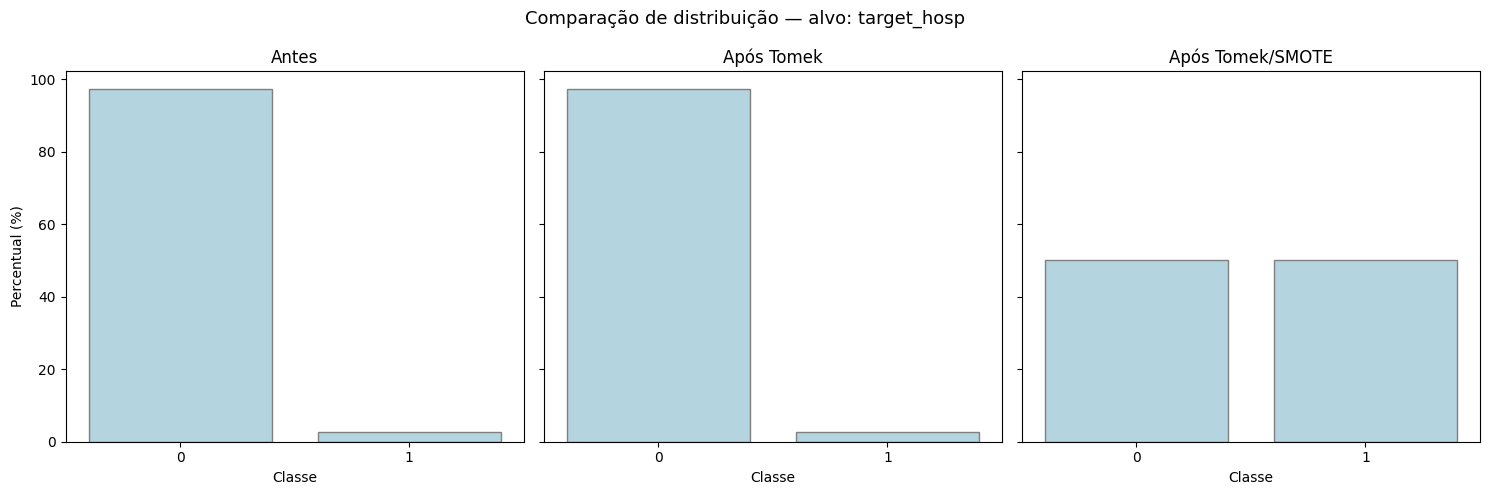

In [68]:
# 5.5 Auditoria comparativa (Antes → Tomek → SMOTE (Após Tomek))
# ------------------------------------------------
# - Objetivo: comparar a distribuição das classes ao longo das etapas de balanceamento.
# ------------------------------------------------

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

dist_original = (y.value_counts(normalize=True) * 100).round(2).to_dict()
dist_tomek    = (y_tomek.value_counts(normalize=True) * 100).round(2).to_dict()
dist_tomek_smote    = (y_tomek_smote.value_counts(normalize=True) * 100).round(2).to_dict()

audit_balance = pd.DataFrame({
    "Antes (%)": dist_original,
    "Após Tomek (%)": dist_tomek,
    "Após Tomek/SMOTE (%)": dist_tomek_smote
}).T

print("=== Auditoria comparativa do balanceamento ===")
print(audit_balance)

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

sns.barplot(x=list(dist_original.keys()), y=list(dist_original.values()),
            ax=axes[0], color="lightblue", edgecolor="gray")
axes[0].set_title("Antes")

sns.barplot(x=list(dist_tomek.keys()), y=list(dist_tomek.values()),
            ax=axes[1], color="lightblue", edgecolor="gray")
axes[1].set_title("Após Tomek")

sns.barplot(x=list(dist_tomek_smote.keys()), y=list(dist_tomek_smote.values()),
            ax=axes[2], color="lightblue", edgecolor="gray")
axes[2].set_title("Após Tomek/SMOTE")

for ax in axes:
    ax.set_xlabel("Classe")
    ax.set_ylabel("Percentual (%)")

plt.suptitle(f"Comparação de distribuição — alvo: {target_col}", fontsize=13)
plt.tight_layout()
plt.show()


## 💾 Serialização dos dados balanceados (SMOTE)

In [69]:
# 💾 Serialização em Pickle (PKL) — Pós-SMOTE
# -------------------------------------------------
# Objetivo:
#   - Salvar os datasets balanceados em formato .pkl
#   - Preserva dtypes (ex: Int64, categorias) que podem se perder no CSV
# Saída:
#   - X_mpox_2022_target_hosp_tomek_smote.pkl
#   - y_mpox_2022_target_hosp_tomek_smote.pkl
# -------------------------------------------------

import joblib

# Caminhos de saída
X_tomek_smote_pkl = "X_mpox_2022_target_hosp_tomek_smote.pkl"
y_tomek_smote_pkl = "y_mpox_2022_target_hosp_tomek_smote.pkl"

# Serializa com joblib (mais eficiente para DataFrames grandes)
joblib.dump(pd.DataFrame(X_tomek_smote, columns=X_num_imp_scaled.columns), X_tomek_smote_pkl)
joblib.dump(y_tomek_smote, y_tomek_smote_pkl)

print(f"✔️ X_tomek_smote salvo em: {X_tomek_smote_pkl}")
print(f"✔️ y_tomek_smote salvo em: {y_tomek_smote_pkl}")

# Checagem pós-salvamento
X_check = joblib.load(X_tomek_smote_pkl)
y_check = joblib.load(y_tomek_smote_pkl)

print("\nChecagem pós-salvamento PKL:")
print("X_tomek_smote:", X_check.shape, "→ dtypes:", X_check.dtypes.unique())
print("y_tomek_smote:", y_check.shape, "→ dtype:", y_check.dtypes)
print(f"\nDistribuição alvo ({y_tomek_smote_pkl[0:-4]}):")
print("🎯Variável-alvo:", )
print(y_check.value_counts(normalize=True) * 100)


✔️ X_tomek_smote salvo em: X_mpox_2022_target_hosp_tomek_smote.pkl
✔️ y_tomek_smote salvo em: y_mpox_2022_target_hosp_tomek_smote.pkl

Checagem pós-salvamento PKL:
X_tomek_smote: (21198, 1388) → dtypes: [dtype('float64')]
y_tomek_smote: (21198,) → dtype: int64

Distribuição alvo (y_mpox_2022_target_hosp_tomek_smote):
🎯Variável-alvo:
target_hosp
0    50.0
1    50.0
Name: proportion, dtype: float64
